# Imports and setting up viz

NB : conda lam1env (Python3.12)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *
from tools_hf import *
from tools_native import *
from tools_LIAISE import *
from tools_mesoNH import *

# sys.path.append('../../python_tools/aborella/PLOTS/')
# from datasets import *
sys.path.append('../../python_tools/aborella/UTIL/')
import xr_utils

In [2]:
# psy.rcParams['auto_show'] = True
# mpl.rcParams['figure.figsize'] = [10., 8.]

# Load files

## LIAISE site obs

### Stations measurements

In [3]:
#load all July obs in one ds
cen_mto_filename='../../../obs/LIAISE/LIAISE_LA-CENDROSA_CNRM_MTO-FLUX-30MIN_L2/LIAISE_LA-CENDROSA_CNRM_MTO-FLUX-30MIN_L2_2021-07*_V3.nc'
cen_mto = format_Cendrosa_obs(cen_mto_filename)
cen_mto

<xarray.Dataset> Size: 708kB
Dimensions:                (time: 1488, level: 2)
Coordinates:
  * time                   (time) datetime64[ns] 12kB 2021-07-01T00:30:00 ......
    time_decimal           (time) float64 12kB 0.5 1.0 1.5 2.0 ... 23.0 23.5 0.0
Dimensions without coordinates: level
Data variables: (12/112)
    time_bnds              (time, level) datetime64[ns] 24kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Qg                     (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    precip                 (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    soil_temp_06           (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    soil_temp_12           (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    soil_temp_3            (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                     ...
    w_v_cov_1              (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    w_v_cov_2              (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    w_v_cov_3              (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    lwnet                  (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    swnet                  (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    mrsos                  (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
Attributes: (12/36)
    creator_name:              William Maurel
    creator_email:             contact.tramm-cnrm@meteo.fr
    acqid:                     Ce210182
    processing_level:          L2
    nom_aeris:                 LA-CENDROSA
    doi:                       https//doi.org/10.25326/320
    ...                        ...
    geospatial_lon_max:        0.92841
    geospatial_lat_min:        41.69336
    geospatial_lat_max:        41.69336
    name:                      obs
    plot_color:                black
    linestyle:                 -

In [4]:
start_time = '2021-07-14T01:00:00'
end_time = '2021-07-30T23:00:00'
restrict_cen_mto = filter_xarray_by_timestamps(cen_mto, start_time, end_time)

In [5]:
filename =  '../../../obs/LIAISE/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2_20210721_V4.0.dat'
ds = dat_to_xarray(filename, 152, 153)
els_mto_2107 = format_ElsPlans_obs(ds, start_day='2021-07-21')

filename =  '../../../obs/LIAISE/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2_20210722_V4.0.dat'
ds = dat_to_xarray(filename, 152, 153)
els_mto_2207 = format_ElsPlans_obs(ds, start_day='2021-07-22')

In [6]:
july_days=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
for day in july_days:
    filename =  '../../../obs/LIAISE/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2/LIAISE_ELS-PLANS_UKMO_MTO-30MIN_L2_202107{}_V4.0.dat'.format(day)
    ds = dat_to_xarray(filename, 152, 153)
    day_els_mto = format_ElsPlans_obs(ds, start_day='2021-07-{}'.format(day))
    if day=='01':
        els_mto=day_els_mto
    else:
        els_mto=xr.concat([els_mto,day_els_mto],dim='time')
els_mto

<xarray.Dataset> Size: 2MB
Dimensions:             (time: 1488)
Coordinates:
  * time                (time) datetime64[ns] 12kB 2021-07-01T00:15:00 ... 20...
    time_decimal        (time) float64 12kB 0.25 0.75 1.25 ... 22.75 23.25 23.75
Data variables: (12/153)
    UTOT_50m            (time) float64 12kB 2.161 2.616 1.718 ... nan nan nan
    USCL_50m            (time) float64 12kB 2.218 2.678 1.889 ... nan nan nan
    UMAX_50m            (time) float64 12kB 4.837 5.374 4.618 ... nan nan nan
    DIR_50m             (time) float64 12kB 160.5 139.8 124.5 ... nan nan nan
    t50m                (time) float64 12kB 20.09 19.89 20.08 ... nan nan nan
    UU_50m              (time) float64 12kB 0.407 0.7082 0.7065 ... nan nan nan
    ...                  ...
    flat                (time) float64 12kB -1.648 -3.088 1.919 ... nan nan nan
    sens                (time) float64 12kB -13.23 -14.36 -15.28 ... nan nan nan
    lwnet               (time) float64 12kB -61.71 -60.65 ... -70.18 -70.23
    swnet               (time) float64 12kB -0.1837 -0.1867 ... -0.006581 0.2021
    mrsos               (time) float64 12kB 12.99 12.96 12.95 ... 23.35 23.33
    q2m                 (time) float64 12kB 12.57 12.55 12.65 ... nan nan nan
Attributes:
    name:        obs
    plot_color:  black
    linestyle:   --

In [7]:
restrict_els_mto = filter_xarray_by_timestamps(els_mto, start_time, end_time)

### Radiosoundings

In [8]:
cendrosa_dir='../../../obs/LIAISE/LIAISE_LA-CENDROSA_CNRM_RS_L2'
cen_files_list=[cendrosa_files_1507,cendrosa_files_1607,cendrosa_files_1707,cendrosa_files_2007,cendrosa_files_2107,cendrosa_files_2207,cendrosa_files_2707]
cen_times_list=[cen_1507_times,cen_1607_times,cen_1707_times,cen_2007_times,cen_2107_times,cen_2207_times,cen_2707_times]

els_dir='../../../obs/LIAISE/LIAISE_ELS-PLANS_UKMO_radiosondes_L1'
els_files_list=[els_files_1507,els_files_1607,els_files_1707,els_files_2007,els_files_2107,els_files_2207,els_files_2707]
els_times_list=[els_1507_times,els_1607_times,els_1707_times,els_2007_times,els_2107_times,els_2207_times,els_2707_times]

In [9]:
cen_RS={}
els_RS={}
for i in range(len(cen_files_list)):
    # print(RS_days_list[i])
    cen_RS_day=RS_extract_full_day(cen_files_list[i], cen_times_list[i], cendrosa_dir, format_Cendrosa_RS)
    els_RS_day=RS_extract_full_day(els_files_list[i], els_times_list[i], els_dir, format_ElsPlans_RS)
    cen_RS[RS_days_list[i]]=cen_RS_day
    els_RS[RS_days_list[i]]=els_RS_day

## MesoNH

In [10]:
mesoNH_dir = '../../../mesoNH_simulations'

In [11]:
def format_MesoNH_outputs_basic(filename, ds_name=None):
    ds = xr.open_mfdataset(filename)
    ds.attrs['name']= ds_name

    rename_dict={
        'time':'start_time',
        'longitude':'lon',
        'latitude':'lat',
        'HBLTOP':'s_pblh',
    }
    ds = ds.rename(rename_dict)

    # Add time coordinate
    # Assuming 'time' coordinate is the starting time.
    base_time = pd.to_datetime(ds["start_time"].isel(start_time=0).item())
    print(f"Base time for the dataset: {base_time}")
    # Create a timedelta for each hour
    hourly_offsets = pd.to_timedelta(ds["record"].values, unit='h')
    new_time_vals = base_time + hourly_offsets
    # Assign new_time as a new coordinate, linked to the 'record' dimension
    ds = ds.assign_coords(time=("record", new_time_vals))
    ds = ds.swap_dims({"record": "time"})
    #drop start_time and record
    ds = ds.drop_vars(['start_time'])
    ds = ds.assign_coords(time_decimal=ds.time.dt.hour + ds.time.dt.minute / 60)

    if 'LE_ISBA' in ds:
        ds = ds.rename({'LE_ISBA': 'flat'})
        ds['flat'].attrs['long_name'] = 'Latent heat flux'
        ds['flat'].attrs['units'] = 'W m⁻²'
    if 'H_ISBA' in ds:
        ds = ds.rename({'H_ISBA': 'sens'})
        ds['sens'].attrs['long_name'] = 'Sensible heat flux'
        ds['sens'].attrs['units'] = 'W m⁻²'
    if 'HU2M_ISBA' in ds:
        ds['rh2m'] = ds['HU2M_ISBA'] * 100.0 
        ds['rh2m'].attrs['long_name'] = 'Relative humidity at 2m'
        ds['rh2m'].attrs['units'] = '%'
    if 'T2M_ISBA' in ds:
        ds = ds.rename({'T2M_ISBA': 't2m'})
        ds['t2m'] = ds['t2m'] - 273.15
        ds['t2m'].attrs['units'] = '°C'
        ds['t2m'].attrs['long_name'] = 'Temperature at 2m'
    if 'SWD' in ds:
        #remove dimension 'start_time' from SWD
        ds['SWD'] = ds['SWD'].squeeze('start_time', drop=True)
        ds = ds.rename({'SWD': 'SWdnSFC'})
        ds['SWdnSFC'].attrs['long_name'] = 'Downward shortwave radiation at surface'
        ds['SWdnSFC'].attrs['name'] = 'Surface SW down'
        ds['SWdnSFC'].attrs['units'] = 'W m⁻²'
    if 'LWD' in ds:
        #remove dimension 'start_time' from LWD
        ds['LWD'] = ds['LWD'].squeeze('start_time', drop=True)
        ds = ds.rename({'LWD': 'LWdnSFC'})
        ds['LWdnSFC'].attrs['long_name'] = 'Downward longwave radiation at surface'
        ds['LWdnSFC'].attrs['name'] = 'Surface LW down'
        ds['LWdnSFC'].attrs['units'] = 'W m⁻²'
    if 'LWU' in ds:
        #remove dimension 'start_time' from LWU
        ds['LWU'] = ds['LWU'].squeeze('start_time', drop=True)
    if 'SWU' in ds:
        #remove dimension 'start_time' from SWU
        ds['SWU'] = ds['SWU'].squeeze('start_time', drop=True)
    if 's_pblh' in ds:
        #remove dimension 'start_time' from HBLTOP
        ds['s_pblh'] = ds['s_pblh'].squeeze('start_time', drop=True)

    # remove ds history attribute
    if 'history' in ds.attrs:
        del ds.attrs['history']

    return(ds)
filename='{}/LIAIS.1*.nc'.format(mesoNH_dir)
# filename='{}/LIAIS.1.UT10.nc'.format(mesoNH_dir)
mesoNH = format_MesoNH_outputs_basic(filename)
# mesoNH

Base time for the dataset: 2021-07-14 01:00:00


In [12]:
def format_MesoNH_outputs_winds(filename, ds_name=None):
    ds = xr.open_mfdataset(filename)
    ds.attrs['name']= ds_name

    rename_dict={
        'time':'start_time',
        'longitude':'lon',
        'latitude':'lat',
    }
    ds = ds.rename(rename_dict)

    # Add time coordinate
    # Assuming 'time' coordinate is the starting time.
    base_time = pd.to_datetime(ds["start_time"].isel(start_time=0).item())
    print(f"Base time for the dataset: {base_time}")
    # Create a timedelta for each hour
    hourly_offsets = pd.to_timedelta(ds["record"].values, unit='h')
    new_time_vals = base_time + hourly_offsets
    # Assign new_time as a new coordinate, linked to the 'record' dimension
    ds = ds.assign_coords(time=("record", new_time_vals))
    ds = ds.swap_dims({"record": "time"})
    #drop start_time and record
    ds = ds.drop_vars(['start_time'])
    ds = ds.assign_coords(time_decimal=ds.time.dt.hour + ds.time.dt.minute / 60)

    if 'UT' in ds:
        ds['UT'].attrs['long_name'] = '10m U wind component'
        ds['UT'].attrs['units'] = 'm s⁻¹'
        ds['UT'] = ds['UT'].squeeze('start_time', drop=True)
        ds['UT'] =ds['UT'].squeeze('level', drop=True)

    if 'VT' in ds:
        ds['VT'].attrs['long_name'] = '10m V wind component'
        ds['VT'].attrs['units'] = 'm s⁻¹'
        ds['VT'] = ds['VT'].squeeze('start_time', drop=True)
        ds['VT'] =ds['VT'].squeeze('level', drop=True)

    ds = flux_pt_to_mass_pt(ds, basic_vars=['UT', 'VT'])

    #rename UT and VT to u10m and v10m
    if 'UT' in ds:
        ds = ds.rename({'UT': 'u10m'})
        ds['u10m'].attrs['long_name'] = '10m U wind component'
        ds['u10m'].attrs['units'] = 'm s⁻¹'
    if 'VT' in ds:
        ds = ds.rename({'VT': 'v10m'})
        ds['v10m'].attrs['long_name'] = '10m V wind component'
        ds['v10m'].attrs['units'] = 'm s⁻¹'

    # remove ds history attribute
    if 'history' in ds.attrs:
        del ds.attrs['history']
    
    #drop longitude and latitude
    ds = ds.drop_vars(['lon', 'lat'])

    return(ds)

filename='{}/winds/LIAIS.1*.nc'.format(mesoNH_dir)
# filename='{}/LIAIS.1.UT10.nc'.format(mesoNH_dir)
mesoNH_winds = format_MesoNH_outputs_winds(filename)

#add surface winds to mesoNH
mesoNH = xr.merge([mesoNH, mesoNH_winds], compat='override')
mesoNH = add_wind_10m( mesoNH)
mesoNH

Base time for the dataset: 2021-07-14 01:00:00
UT: coordinates 'ni_u' changed to 'ni'
UT: coordinates 'nj_u' changed to 'nj'
VT: coordinates 'nj_v' changed to 'nj'
VT: coordinates 'ni_v' changed to 'ni'
no old coordinate dropped - error during ds.drop()


<xarray.Dataset> Size: 3GB
Dimensions:             (time: 408, nj: 164, ni: 290, level: 1, ni_u: 290,
                         nj_u: 164, ni_v: 290, nj_v: 164)
Coordinates:
  * ni                  (ni) float64 2kB 0.0 2e+03 4e+03 ... 5.76e+05 5.78e+05
  * nj                  (nj) float64 1kB 0.0 2e+03 4e+03 ... 3.24e+05 3.26e+05
    lat                 (nj, ni) float64 380kB dask.array<chunksize=(164, 290), meta=np.ndarray>
    lon                 (nj, ni) float64 380kB dask.array<chunksize=(164, 290), meta=np.ndarray>
  * time                (time) datetime64[ns] 3kB 2021-07-14T01:00:00 ... 202...
    time_decimal        (time) float64 3kB 1.0 2.0 3.0 4.0 ... 22.0 23.0 0.0
  * level               (level) float64 8B 10.49
  * ni_u                (ni_u) float64 2kB -1e+03 1e+03 ... 5.75e+05 5.77e+05
  * nj_u                (nj_u) float64 1kB 0.0 2e+03 4e+03 ... 3.24e+05 3.26e+05
  * ni_v                (ni_v) float64 2kB 0.0 2e+03 4e+03 ... 5.76e+05 5.78e+05
  * nj_v                (nj_v) float64 1kB -1e+03 1e+03 ... 3.23e+05 3.25e+05
Data variables: (12/18)
    s_pblh              (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    HU2M_ISBA           (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    sens                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    flat                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    LWdnSFC             (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    LWU                 (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    ...                  ...
    TG3_ISBA            (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    rh2m                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    u10m                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 33), meta=np.ndarray>
    v10m                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 19, 290), meta=np.ndarray>
    wind_speed_10m      (time, nj, ni) float64 155MB dask.array<chunksize=(1, 19, 33), meta=np.ndarray>
    wind_direction_10m  (time, nj, ni) float64 155MB dask.array<chunksize=(1, 19, 33), meta=np.ndarray>
Attributes:
    MNH_cleanly_closed:  yes
    NCO:                 netCDF Operators version 5.2.1 (Homepage = http://nc...
    name:                None

In [13]:
load_4D=True
def format_MesoNH_outputs_4D(filename, ds_name=None):
    ds = xr.open_mfdataset(filename)
    ds.attrs['name']= ds_name


    rename_dict={
        'time':'start_time',
        'longitude':'lon',
        'latitude':'lat',
        'THT':'theta',
        'TKET':'tke',
        'UT':'vitu',
        'VT':'vitv',
        'WT':'vitw',
    }
    ds = ds.rename(rename_dict)

    # Add time coordinate
    # Assuming 'time' coordinate is the starting time.
    base_time = pd.to_datetime(ds["start_time"].isel(start_time=0).item())
    print(f"Base time for the dataset: {base_time}")
    #Create a timedelta for each hour
    hourly_offsets = pd.to_timedelta(ds["record"].values, unit='h')
    new_time_vals = base_time + hourly_offsets
    # Assign new_time as a new coordinate, linked to the 'record' dimension
    ds = ds.assign_coords(time=("record", new_time_vals))
    ds = ds.swap_dims({"record": "time"})
    #drop start_time
    # ds = ds.drop_vars(['start_time'])
    # ds = ds.drop_dims(['start_time'])
    ds = ds.squeeze('start_time', drop=True)

    ds = add_specific_humidity_from_mixing_ratio(ds)

    ds['altitude_agl'] = ds['level']

    ds = ds.assign_coords(time_decimal=ds.time.dt.hour + ds.time.dt.minute / 60)

    #remove ds history attribute
    if 'history' in ds.attrs:
        del ds.attrs['history']

    ds = flux_pt_to_mass_pt(ds, basic_vars=['vitu', 'vitv', 'vitw'])
    ds = add_wind_speed(ds)
    ds = add_wind_direction(ds)
    
    return ds

# if load_4D:
# filename='{}/4D/LIAIS.1.SEG16.012subset_abl_6var.nc'.format(mesoNH_dir)
filename='{}/4D/LIAIS.1.subset_abl_8vars.nc'.format(mesoNH_dir)

mesoNH_4D = format_MesoNH_outputs_4D(filename)
mesoNH_4D

Base time for the dataset: 2021-07-14 01:00:00
vitu: coordinates 'ni_u' changed to 'ni'
vitu: coordinates 'nj_u' changed to 'nj'
vitv: coordinates 'nj_v' changed to 'nj'
vitv: coordinates 'ni_v' changed to 'ni'
vitw: coordinate 'level_w' changed to 'level'


<xarray.Dataset> Size: 2GB
Dimensions:         (time: 408, level_w: 90, nj: 26, ni: 37, level: 66)
Coordinates:
    lat             (nj, ni) float64 8kB dask.array<chunksize=(26, 37), meta=np.ndarray>
  * level           (level) float64 528B -2.0 2.0 6.12 ... 2.654e+03 2.835e+03
    lon             (nj, ni) float64 8kB dask.array<chunksize=(26, 37), meta=np.ndarray>
  * ni              (ni) float64 296B 3.12e+05 3.14e+05 ... 3.82e+05 3.84e+05
  * nj              (nj) float64 208B 9e+04 9.2e+04 9.4e+04 ... 1.38e+05 1.4e+05
  * time            (time) datetime64[ns] 3kB 2021-07-14T01:00:00 ... 2021-07-31
    time_decimal    (time) float64 3kB 1.0 2.0 3.0 4.0 ... 21.0 22.0 23.0 0.0
Dimensions without coordinates: level_w
Data variables: (12/14)
    ALT             (time, level_w, nj, ni) float64 283MB dask.array<chunksize=(1, 90, 26, 37), meta=np.ndarray>
    PABST           (time, level, nj, ni) float64 207MB dask.array<chunksize=(1, 30, 26, 37), meta=np.ndarray>
    RVT             (time, level, nj, ni) float64 207MB dask.array<chunksize=(1, 30, 26, 37), meta=np.ndarray>
    theta           (time, level, nj, ni) float64 207MB dask.array<chunksize=(1, 30, 26, 37), meta=np.ndarray>
    tke             (time, level, nj, ni) float64 207MB dask.array<chunksize=(1, 30, 26, 37), meta=np.ndarray>
    vitu            (time, level, nj, ni) float64 207MB dask.array<chunksize=(1, 15, 26, 19), meta=np.ndarray>
    ...              ...
    ZS              (time, nj, ni) float64 3MB dask.array<chunksize=(1, 26, 37), meta=np.ndarray>
    ZTOP            (time) float64 3kB dask.array<chunksize=(1,), meta=np.ndarray>
    ovap            (time, level, nj, ni) float64 207MB dask.array<chunksize=(1, 30, 26, 37), meta=np.ndarray>
    altitude_agl    (level) float64 528B -2.0 2.0 6.12 ... 2.654e+03 2.835e+03
    wind_speed      (time, level, nj, ni) float64 207MB dask.array<chunksize=(1, 15, 26, 19), meta=np.ndarray>
    wind_direction  (time, level, nj, ni) float64 207MB dask.array<chunksize=(1, 15, 26, 19), meta=np.ndarray>
Attributes:
    MNH_cleanly_closed:  yes
    NCO:                 netCDF Operators version 5.2.1 (Homepage = http://nc...
    name:                None

In [14]:
#extract pressure at surface from mesoNH_4D and add it to mesoNH
mesoNH = extract_pressure_surface(mesoNH_4D, mesoNH)
#add specific humidity at 2m to mesoNH
mesoNH = add_specific_humidity_2m(mesoNH, t2m_in_kelvin=False, psol_Pa=True)
#add wind levels
mesoNH = extract_wind_pressure(mesoNH_4D, mesoNH, pressure_level=850)
mesoNH = extract_wind_pressure(mesoNH_4D, mesoNH, pressure_level=900)
mesoNH = extract_wind_pressure(mesoNH_4D, mesoNH, pressure_level=950)

mesoNH = extract_w10m(mesoNH_4D, mesoNH)


mesoNH

/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 13
  result = blockwise(
/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 16
  result = blockwise(
/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 13
  result = blockwise(
/home/ptiengou/miniconda3/envs/lam1env/lib/python3.12/site-packages/dask/array/core.py:4998: PerformanceW

<xarray.Dataset> Size: 5GB
Dimensions:             (ni: 290, nj: 164, time: 408, level: 1, ni_u: 290,
                         nj_u: 164, ni_v: 290, nj_v: 164)
Coordinates:
  * ni                  (ni) float64 2kB 0.0 2e+03 4e+03 ... 5.76e+05 5.78e+05
  * nj                  (nj) float64 1kB 0.0 2e+03 4e+03 ... 3.24e+05 3.26e+05
  * time                (time) datetime64[ns] 3kB 2021-07-14T01:00:00 ... 202...
  * level               (level) float64 8B 10.49
  * ni_u                (ni_u) float64 2kB -1e+03 1e+03 ... 5.75e+05 5.77e+05
  * nj_u                (nj_u) float64 1kB 0.0 2e+03 4e+03 ... 3.24e+05 3.26e+05
  * ni_v                (ni_v) float64 2kB 0.0 2e+03 4e+03 ... 5.76e+05 5.78e+05
  * nj_v                (nj_v) float64 1kB -1e+03 1e+03 ... 3.23e+05 3.25e+05
    lat                 (nj, ni) float64 380kB dask.array<chunksize=(164, 290), meta=np.ndarray>
    lon                 (nj, ni) float64 380kB dask.array<chunksize=(164, 290), meta=np.ndarray>
    time_decimal        (time) float64 3kB 1.0 2.0 3.0 4.0 ... 22.0 23.0 0.0
Data variables: (12/30)
    s_pblh              (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    HU2M_ISBA           (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    sens                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    flat                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    LWdnSFC             (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    LWU                 (time, nj, ni) float64 155MB dask.array<chunksize=(1, 164, 290), meta=np.ndarray>
    ...                  ...
    v900                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 26, 37), meta=np.ndarray>
    w900                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 13, 18), meta=np.ndarray>
    u950                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 26, 18), meta=np.ndarray>
    v950                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 26, 37), meta=np.ndarray>
    w950                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 13, 18), meta=np.ndarray>
    w10m                (time, nj, ni) float64 155MB dask.array<chunksize=(1, 13, 18), meta=np.ndarray>
Attributes:
    MNH_cleanly_closed:  yes
    NCO:                 netCDF Operators version 5.2.1 (Homepage = http://nc...
    name:                None

## Subdataset for ICOLMDZ grid cells and obs sites

### Cell mean

In [15]:
mesoNH_elsplans_cell= subset_dataset_by_polygon(mesoNH, elsplans_cell, 
                                            name='mesoNH_mean',
                                            plot_color='darkorange')
mesoNH_cendrosa_cell= subset_dataset_by_polygon(mesoNH, cendrosa_cell, 
                                            name='mesoNH_mean',
                                            plot_color='darkorange')

In [16]:
mesoNH_4D_cendrosa_cell = subset_dataset_by_polygon(mesoNH_4D, cendrosa_cell, 
                                            name='mesoNH_mean',
                                            plot_color='darkorange')

mesoNH_4D_elsplans_cell = subset_dataset_by_polygon(mesoNH_4D, elsplans_cell, 
                                            name='mesoNH_mean',
                                            plot_color='darkorange')

In [17]:
mesoNH_4D_cendrosa_cell_mean = mesoNH_4D_cendrosa_cell.mean(dim=['ni','nj'])
mesoNH_4D_cendrosa_cell_mean.attrs = mesoNH_4D_cendrosa_cell.attrs

mesoNH_4D_elsplans_cell_mean = mesoNH_4D_elsplans_cell.mean(dim=['ni','nj'])
mesoNH_4D_elsplans_cell_mean.attrs = mesoNH_4D_elsplans_cell.attrs

In [18]:
#quantiles for mesoNH
mesoNH_4D_cendrosa_cell_q25 = mesoNH_4D_cendrosa_cell.quantile(0.25, dim=['ni','nj'])
mesoNH_4D_cendrosa_cell_q75 = mesoNH_4D_cendrosa_cell.quantile(0.75, dim=['ni','nj'])
mesoNH_4D_elsplans_cell_q25 = mesoNH_4D_elsplans_cell.quantile(0.25, dim=['ni','nj'])
mesoNH_4D_elsplans_cell_q75 = mesoNH_4D_elsplans_cell.quantile(0.75, dim=['ni','nj'])

mesoNH_4D_cendrosa_cell_q5 = mesoNH_4D_cendrosa_cell.quantile(0.05, dim=['ni','nj'])
mesoNH_4D_cendrosa_cell_q95 = mesoNH_4D_cendrosa_cell.quantile(0.95, dim=['ni','nj'])
mesoNH_4D_elsplans_cell_q5 = mesoNH_4D_elsplans_cell.quantile(0.05, dim=['ni','nj'])
mesoNH_4D_elsplans_cell_q95 = mesoNH_4D_elsplans_cell.quantile(0.95, dim=['ni','nj'])

### Exact cell

In [19]:
#select subdataset for precisely each site
mesoNH_cendrosa_exact = select_dataset_lon_lat(mesoNH, 
                                        lon=Cendrosa_Longitude, lat=Cendrosa_Latitude, 
                                        name='mesoNH_exact',
                                        plot_color='purple')

In [20]:
mesoNH_elsplans_exact = select_dataset_lon_lat(mesoNH, 
                                        lon=ElsPlans_Longitude, lat=ElsPlans_Latitude, 
                                        name='mesoNH_exact', 
                                        plot_color='purple')

In [21]:
mesoNH_4D_cendrosa_exact = select_dataset_lon_lat(mesoNH_4D,
                                        lon=Cendrosa_Longitude, lat=Cendrosa_Latitude,
                                        name='mesoNH_exact',
                                        plot_color='purple')

In [22]:
mesoNH_4D_elsplans_exact = select_dataset_lon_lat(mesoNH_4D,
                                        lon=ElsPlans_Longitude, lat=ElsPlans_Latitude,
                                        name='mesoNH_exact',
                                        plot_color='purple')

### Subset for a given class of flat or fsens

In [23]:
def subset_bin(ds, var, timestamp, bin_min, bin_max):
    """
    Subset an xarray Dataset based on a variable's value range at a specific timestamp.

    Parameters:
    ds (xarray.Dataset): The input dataset.
    var (str): The variable name to filter on.
    timestamp (str or pd.Timestamp): The specific timestamp to consider.
    bin_min (float): The minimum value of the bin (inclusive).
    bin_max (float): The maximum value of the bin (exclusive).

    Returns:
    xarray.Dataset: A subset of the original dataset where the variable's value at the specified timestamp falls within the given range.
    """

    # Select data at the specified timestamp
    ds_at_time = ds.sel(time=timestamp, method='nearest')

    # Create a boolean mask for the variable within the specified range
    mask = (ds_at_time[var] >= bin_min) & (ds_at_time[var] < bin_max)

    # Apply the mask to the original dataset
    subset_ds = ds_at_time.where(ds_at_time[var] < bin_max).where(ds_at_time[var] >= bin_min)
    subset_mean = subset_ds.mean(dim=['ni','nj'])
    subset_q25 = subset_ds.quantile(0.25, dim=['ni','nj'])
    subset_q75 = subset_ds.quantile(0.75, dim=['ni','nj'])

    return subset_ds, subset_mean, subset_q25, subset_q75

In [24]:
def subset_with_mask(ds_4D: xr.Dataset, ds_mask: xr.Dataset, var: str, timestamp: str or pd.Timestamp, bin_min: float, bin_max: float):
    """
    Subsets one xarray Dataset (ds_4D) by applying a mask computed from another (ds_mask).

    The mask is determined by a variable's value range in ds_mask at a specific timestamp.
    The resulting subset_ds_4D will contain data only for grid cells where the variable
    in ds_mask falls within the specified bin limits.

    Parameters:
    ds_4D (xarray.Dataset): The dataset to be subsetted. This is the 4D dataset.
    ds_mask (xarray.Dataset): The dataset used to compute the mask.
    var (str): The variable name to filter on.
    timestamp (str or pd.Timestamp): The specific timestamp to consider for the mask.
    bin_min (float): The minimum value of the bin (inclusive).
    bin_max (float): The maximum value of the bin (exclusive).

    Returns:
    tuple: A tuple containing:
           - subset_ds (xarray.Dataset): The subsetted dataset.
           - subset_mean (xarray.DataArray): The mean of the subsetted data across spatial dimensions.
           - subset_q25 (xarray.DataArray): The 25th percentile of the subsetted data.
           - subset_q75 (xarray.DataArray): The 75th percentile of the subsetted data.
    """

    # 1. Create a 2D mask from ds_mask at the specified timestamp
    # We select the timestamp and then apply the bin limits
    ds_mask_at_time = ds_mask.sel(time=timestamp, method='nearest')
    mask = (ds_mask_at_time[var] >= bin_min) & (ds_mask_at_time[var] < bin_max)

    # 2. Apply the 2D mask to the 4D dataset.
    # xarray automatically broadcasts the 2D mask across the time dimension.
    ds4D_at_time = ds_4D.sel(time=timestamp, method='nearest')
    subset_ds = ds4D_at_time.where(mask)

    # 3. Compute statistics on the subsetted dataset
    subset_mean = subset_ds.mean(dim=['ni','nj'])
    subset_q25 = subset_ds.quantile(0.25, dim=['ni','nj'])
    subset_q75 = subset_ds.quantile(0.75, dim=['ni','nj'])

    return subset_ds, subset_mean, subset_q25, subset_q75

In [25]:
cendrosa_1507_flat_bin=(300,325)
cendrosa_1507_sens_bin=(175,200)
elsplans_1507_flat_bin=(0,25)
elsplans_1507_sens_bin=(475,500)

cendrosa_2007_flat_bin=(350,375)
cendrosa_2007_sens_bin=(125,150)
elsplans_2007_flat_bin=(0,25)
elsplans_2007_sens_bin=(475,500)

In [26]:
adjust_bin_value=0
var = 'sens'
#Cendrosa
ds_mask=mesoNH_cendrosa_cell
ds_4D=mesoNH_4D_cendrosa_cell

timestamp = '2021-07-15T12:00:00'
bin_min = cendrosa_1507_sens_bin[0]-adjust_bin_value
bin_max = cendrosa_1507_sens_bin[1]+adjust_bin_value
mesoNH_cendrosa_1507_sens, mesoNH_cendrosa_1507_sens_mean, mesoNH_cendrosa_1507_sens_q25, mesoNH_cendrosa_1507_sens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

timestamp = '2021-07-20T12:00:00'
bin_min = cendrosa_2007_sens_bin[0]-adjust_bin_value
bin_max = cendrosa_2007_sens_bin[1]+adjust_bin_value
mesoNH_cendrosa_2007_sens, mesoNH_cendrosa_2007_sens_mean, mesoNH_cendrosa_2007_sens_q25, mesoNH_cendrosa_2007_sens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

#Els Plans
ds_mask=mesoNH_elsplans_cell
ds_4D=mesoNH_4D_elsplans_cell

timestamp = '2021-07-15T12:00:00'
bin_min = elsplans_1507_sens_bin[0]-50
bin_max = elsplans_1507_sens_bin[1]+adjust_bin_value
mesoNH_elsplans_1507_sens, mesoNH_elsplans_1507_sens_mean, mesoNH_elsplans_1507_sens_q25, mesoNH_elsplans_1507_sens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

timestamp = '2021-07-20T12:00:00'
bin_min = elsplans_2007_sens_bin[0]-adjust_bin_value
bin_max = elsplans_2007_sens_bin[1]+adjust_bin_value
mesoNH_elsplans_2007_sens, mesoNH_elsplans_2007_sens_mean, mesoNH_elsplans_2007_sens_q25, mesoNH_elsplans_2007_sens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

In [27]:
#min and max
cendrosa_1507_min_bin=(100,150)
cendrosa_1507_max_bin=(400,450)
elsplans_1507_min_bin=(100,200)
elsplans_1507_max_bin=(400,450)

cendrosa_2007_min_bin=(50,100)
cendrosa_2007_max_bin=(375,425)
elsplans_2007_min_bin=(50,125)
elsplans_2007_max_bin=(450,500)

In [28]:
var = 'sens'
#Cendrosa
ds_mask=mesoNH_cendrosa_cell
ds_4D=mesoNH_4D_cendrosa_cell

timestamp = '2021-07-15T12:00:00'
bin_min = cendrosa_1507_min_bin[0]
bin_max = cendrosa_1507_min_bin[1]
mesoNH_cendrosa_1507_minsens, mesoNH_cendrosa_1507_minsens_mean, mesoNH_cendrosa_1507_minsens_q25, mesoNH_cendrosa_1507_minsens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

bin_min = cendrosa_1507_max_bin[0]
bin_max = cendrosa_1507_max_bin[1]
mesoNH_cendrosa_1507_maxsens, mesoNH_cendrosa_1507_maxsens_mean, mesoNH_cendrosa_1507_maxsens_q25, mesoNH_cendrosa_1507_maxsens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

timestamp = '2021-07-20T12:00:00'
bin_min = cendrosa_2007_min_bin[0]
bin_max = cendrosa_2007_min_bin[1]
mesoNH_cendrosa_2007_minsens, mesoNH_cendrosa_2007_minsens_mean, mesoNH_cendrosa_2007_minsens_q25, mesoNH_cendrosa_2007_minsens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

bin_min = cendrosa_2007_max_bin[0]
bin_max = cendrosa_2007_max_bin[1]
mesoNH_cendrosa_2007_maxsens, mesoNH_cendrosa_2007_maxsens_mean, mesoNH_cendrosa_2007_maxsens_q25, mesoNH_cendrosa_2007_maxsens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

#Els Plans
ds_mask=mesoNH_elsplans_cell
ds_4D=mesoNH_4D_elsplans_cell

timestamp = '2021-07-15T12:00:00'
bin_min = elsplans_1507_min_bin[0]
bin_max = elsplans_1507_min_bin[1]
mesoNH_elsplans_1507_minsens, mesoNH_elsplans_1507_minsens_mean, mesoNH_elsplans_1507_minsens_q25, mesoNH_elsplans_1507_minsens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

bin_min = elsplans_1507_max_bin[0]
bin_max = elsplans_1507_max_bin[1]
mesoNH_elsplans_1507_maxsens, mesoNH_elsplans_1507_maxsens_mean, mesoNH_elsplans_1507_maxsens_q25, mesoNH_elsplans_1507_maxsens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

timestamp = '2021-07-20T12:00:00'
bin_min = elsplans_2007_min_bin[0]
bin_max = elsplans_2007_min_bin[1]
mesoNH_elsplans_2007_minsens, mesoNH_elsplans_2007_minsens_mean, mesoNH_elsplans_2007_minsens_q25, mesoNH_elsplans_2007_minsens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

bin_min = elsplans_2007_max_bin[0]
bin_max = elsplans_2007_max_bin[1]
mesoNH_elsplans_2007_maxsens, mesoNH_elsplans_2007_maxsens_mean, mesoNH_elsplans_2007_maxsens_q25, mesoNH_elsplans_2007_maxsens_q75 = subset_with_mask(ds_4D, ds_mask, var, timestamp, bin_min, bin_max)

#make them all with color darkorange and line style ----
def set_plot_style(ds, color='darkorange', line_style='--'):
    ds.attrs['plot_color'] = color
    ds.attrs['linestyle'] = line_style
    return ds
mesoNH_cendrosa_1507_minsens_mean = set_plot_style(mesoNH_cendrosa_1507_minsens_mean, color='darkorange', line_style=':')
mesoNH_cendrosa_1507_maxsens_mean = set_plot_style(mesoNH_cendrosa_1507_maxsens_mean, color='darkorange', line_style='--')
mesoNH_cendrosa_2007_minsens_mean = set_plot_style(mesoNH_cendrosa_2007_minsens_mean, color='darkorange', line_style=':')
mesoNH_cendrosa_2007_maxsens_mean = set_plot_style(mesoNH_cendrosa_2007_maxsens_mean, color='darkorange', line_style='--')
mesoNH_elsplans_1507_minsens_mean = set_plot_style(mesoNH_elsplans_1507_minsens_mean, color='darkorange', line_style=':')
mesoNH_elsplans_1507_maxsens_mean = set_plot_style(mesoNH_elsplans_1507_maxsens_mean, color='darkorange', line_style='--')
mesoNH_elsplans_2007_minsens_mean = set_plot_style(mesoNH_elsplans_2007_minsens_mean, color='darkorange', line_style=':')
mesoNH_elsplans_2007_maxsens_mean = set_plot_style(mesoNH_elsplans_2007_maxsens_mean, color='darkorange', line_style='--')  

## Load LMDZ files

In [29]:
nat_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/noirr'

boost_irrig_dir= '../../../JZ_simu_outputs/LAM/LAM_1500_60/boost_irrig'

In [30]:
noirr=True
irr100=True
routing_restart_full_beta1=True

In [31]:
#load LMDZ
if noirr:
    lmdz_noirr_file = '{}/LAM_1500_60_sim267/sim267_20210701_20210731_HF_histhf.nc'.format(nat_dir)
    lmdz_noirr = format_lmdz_HF(lmdz_noirr_file, 'red', 'noirr')
    lmdz_noirr = lmdz_noirr.sel(time=slice('2021-07-14', '2021-07-30'))
    cen_lmdz_noirr, els_lmdz_noirr  , sop_cen_lmdz_noirr,   sop_els_lmdz_noirr = select_liaise_sites_sop(lmdz_noirr, 'no_irr', linestyle_cen='-', linestyle_els='-')


In [32]:
if irr100:
    dir=boost_irrig_dir
    sim_name='sim275'
    color='blue'
    label='irr'

    lmdz_irr100_file = '{}/{}_20210701_20210731_HF_histhf.nc'.format(dir, sim_name)
    lmdz_irr100 = format_lmdz_HF(lmdz_irr100_file, color, label)
    lmdz_irr100 = lmdz_irr100.sel(time=slice('2021-07-14', '2021-07-30'))
    cen_lmdz_irr100, els_lmdz_irr100  , sop_cen_lmdz_irr100,   sop_els_lmdz_irr100 = select_liaise_sites_sop(lmdz_irr100, label, linestyle_cen='-', linestyle_els='-')


In [33]:
if routing_restart_full_beta1 :
    dir=boost_irrig_dir
    sim_name='sim293'
    color='green'
    label='irr_boost'

    lmdz_routingfull_beta1_file = '{}/{}_20210701_20210731_HF_histhf.nc'.format(dir, sim_name)
    lmdz_routingfull_beta1 = format_lmdz_HF(lmdz_routingfull_beta1_file, color, label)
    lmdz_routingfull_beta1 = lmdz_routingfull_beta1.sel(time=slice('2021-07-14', '2021-07-30'))
    cen_lmdz_routingfull_beta1, els_lmdz_routingfull_beta1, sop_cen_lmdz_routingfull_beta1, sop_els_lmdz_routingfull_beta1 = select_liaise_sites_sop(lmdz_routingfull_beta1, label, linestyle_cen='-', linestyle_els='-')

In [34]:
nudged_lmdz=True
if routing_restart_full_beta1 and nudged_lmdz:
    dir=boost_irrig_dir
    sim_name='sim299'
    color='darkorange'
    label='irr_boost_nudged'

    lmdz_routingfull_beta1_nudged_file = '{}/{}_20210701_20210731_HF_histhf.nc'.format(dir, sim_name)
    lmdz_routingfull_beta1_nudged = format_lmdz_HF(lmdz_routingfull_beta1_nudged_file, color, label)
    lmdz_routingfull_beta1_nudged = lmdz_routingfull_beta1_nudged.sel(time=slice('2021-07-14', '2021-07-30'))
    cen_lmdz_routingfull_beta1_nudged, els_lmdz_routingfull_beta1_nudged, sop_cen_lmdz_routingfull_beta1_nudged, sop_els_lmdz_routingfull_beta1_nudged = select_liaise_sites_sop(lmdz_routingfull_beta1_nudged, label)

## Load ORC files

In [55]:
def format_ORC_HF(filename, color, name):
    ds = xr.open_mfdataset(filename)
    ds = ds.rename({'time_counter':'time',})
    ds = ds.assign_coords(time_decimal=ds.time.dt.hour + ds.time.dt.minute / 60)
    ds.attrs['name'] = name
    ds.attrs['plot_color']= color
    # ds = ds.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

    ds['evapot']=ds['evapot'] * 3600 * 24
    ds['evapot'].attrs['units'] = 'mm d⁻¹'

    ds['evapot_corr']=ds['evapot_corr'] * 3600 * 24
    ds['evapot_corr'].attrs['units'] = 'mm d⁻¹'

    ds['flat'] = ds['evap'] /  (0.408 * 0.0864)
    ds['flat'].attrs['units'] = 'W m⁻²'

    ds['irrigation'].attrs['units'] = 'mm d⁻¹'
    ds['netirrig'].attrs['units'] = 'mm d⁻¹'

    ds['tran'] = ds['tran'] * 3600 * 24
    ds['tran'].attrs['units'] = 'mm d⁻¹'

    # ds['inter_12'] = ds['inter'][:,11,:]
    # ds['inter_12'].attrs['units'] = 'mm d⁻¹'
    # ds['inter_12'].attrs['long_name'] = 'Interception for PFT12'

    # ds['inter_5'] = ds['inter'][:,4,:]
    # ds['inter_13'] = ds['inter'][:,12,:]

    # if 'humtot_soil' in ds:
    #     ds['humtot_1'] = ds['humtot_soil'][:,0,:]
    #     ds['humtot_2'] = ds['humtot_soil'][:,1,:]
    #     ds['humtot_3'] = ds['humtot_soil'][:,2,:]
    
    # ds['soil_temp_01'] = ds['ptn'][:,3,:] - 273.15
    # ds['soil_temp_01'].attrs['units'] = '°C'
    # ds['soil_temp_01'].attrs['long_name'] = 'Soil temperature at 1.3cm'
    # ds['soil_temp_03'] = ds['ptn'][:,4,:] - 273.15
    # ds['soil_temp_03'].attrs['units'] = '°C'
    # ds['soil_temp_03'].attrs['long_name'] = 'Soil temperature at 2.9cm'
    # ds['soil_temp_06'] = ds['ptn'][:,5,:] - 273.15
    # ds['soil_temp_06'].attrs['units'] = '°C'
    # ds['soil_temp_06'].attrs['long_name'] = 'Soil temperature at 6.06cm'
    # ds['soil_temp_12'] = ds['ptn'][:,6,:] - 273.15
    # ds['soil_temp_12'].attrs['units'] = '°C'
    # ds['soil_temp_12'].attrs['long_name'] = 'Soil temperature at 12.3cm'

    # if 'npp' in ds:
    #     ds['npp_12'] = ds['npp'][:,11,:]
    #     ds['npp_6'] = ds['npp'][:,5,:]
    #     ds['npp_13'] = ds['npp'][:,12,:]

    # if 'gpp' in ds:
    #     ds['gpp_12'] = ds['gpp'][:,11,:]
    #     ds['gpp_6'] = ds['gpp'][:,5,:]
    #     ds['gpp_13'] = ds['gpp'][:,12,:]
    # if 'lai' in ds:
    #     ds['lai_12'] = ds['lai'][:,11,:]
    #     ds['lai_6'] = ds['lai'][:,5,:]
    #     ds['lai_13'] = ds['lai'][:,12,:]
    # if 'maxvegetfrac' in ds:
    #     ds['maxvegetfrac_12'] = ds['maxvegetfrac'][:,11,:]
    #     ds['maxvegetfrac_6'] = ds['maxvegetfrac'][:,5,:]
    #     ds['maxvegetfrac_13'] = ds['maxvegetfrac'][:,12,:]
    return ds

In [56]:
load_ORC=True
if load_ORC:
    #noirr
    orc_noirr_file =  '{}/LAM_1500_60_sim267/sim267_20210701_20210731_HF_sechiba_out_2.nc'.format(nat_dir)
    orc_noirr = format_ORC_HF(orc_noirr_file, color='red', name='no_irr')
    orc_noirr = orc_noirr.sel(time=slice('2021-07-14', '2021-07-30'))
    cen_orc_noirr, els_orc_noirr, sop_cen_orc_noirr, sop_els_orc_noirr = select_liaise_sites_sop(orc_noirr, 'no_irr')

    #irr100
    orc_irr100_file = '{}/sim275_20210701_20210731_HF_sechiba_out_2.nc'.format(boost_irrig_dir)
    orc_irr100 = format_ORC_HF(orc_irr100_file, color='blue', name='irr')
    orc_irr100 = orc_irr100.sel(time=slice('2021-07-14', '2021-07-30'))
    cen_orc_irr100, els_orc_irr100, sop_cen_orc_irr100, sop_els_orc_irr100 = select_liaise_sites_sop(orc_irr100, 'irr')

    #routing_restart_full_beta1
    orc_routingfull_beta1_file = '{}/sim293_20210701_20210731_HF_sechiba_out_2.nc'.format(boost_irrig_dir)
    orc_routingfull_beta1 = format_ORC_HF(orc_routingfull_beta1_file, color='green', name='irr_boost')
    orc_routingfull_beta1 = orc_routingfull_beta1.sel(time=slice('2021-07-14', '2021-07-30'))
    cen_orc_routingfull_beta1, els_orc_routingfull_beta1, sop_cen_orc_routingfull_beta1, sop_els_orc_routingfull_beta1 = select_liaise_sites_sop(orc_routingfull_beta1, 'irr_boost')        

    if nudged_lmdz:
        orc_routingfull_beta1_nudged_file = '{}/sim299_20210701_20210731_HF_sechiba_out_2.nc'.format(boost_irrig_dir)
        orc_routingfull_beta1_nudged = format_ORC_HF(orc_routingfull_beta1_nudged_file, color='darkorange', name='irr_boost_nudged')
        orc_routingfull_beta1_nudged = orc_routingfull_beta1_nudged.sel(time=slice('2021-07-14', '2021-07-30'))
        cen_orc_routingfull_beta1_nudged, els_orc_routingfull_beta1_nudged, sop_cen_orc_routingfull_beta1_nudged, sop_els_orc_routingfull_beta1_nudged = select_liaise_sites_sop(orc_routingfull_beta1_nudged, 'irr_boost_nudged')

## Subset LMDZ and MesoNH ds for LIAISE sites and IOP days

In [57]:
#SOP
day_start_times=[day1_start_time, day2_start_time, day3_start_time, day4_start_time, day5_start_time, day6_start_time, day7_start_time]
day_end_times  =[day1_end_time, day2_end_time, day3_end_time, day4_end_time, day5_end_time, day6_end_time, day7_end_time]

In [58]:
iop_cen_lmdz_noirr = {}
iop_cen_lmdz_irr100 = {}
iop_cen_lmdz_routingfull_beta1 = {}
iop_cen_lmdz_routingfull_beta1_nudged = {}
iop_els_lmdz_noirr = {}
iop_els_lmdz_irr100 = {}
iop_els_lmdz_routingfull_beta1 = {}
iop_els_lmdz_routingfull_beta1_nudged = {}
for i,day in enumerate(RS_days_list):
    iop_cen_lmdz_noirr[day] = filter_xarray_by_timestamps(cen_lmdz_noirr, day_start_times[i], day_end_times[i])
    iop_cen_lmdz_irr100[day] = filter_xarray_by_timestamps(cen_lmdz_irr100, day_start_times[i], day_end_times[i])
    iop_cen_lmdz_routingfull_beta1[day] = filter_xarray_by_timestamps(cen_lmdz_routingfull_beta1, day_start_times[i], day_end_times[i])
    iop_els_lmdz_noirr[day] = filter_xarray_by_timestamps(els_lmdz_noirr, day_start_times[i], day_end_times[i])
    iop_els_lmdz_irr100[day] = filter_xarray_by_timestamps(els_lmdz_irr100, day_start_times[i], day_end_times[i])
    iop_els_lmdz_routingfull_beta1[day] = filter_xarray_by_timestamps(els_lmdz_routingfull_beta1, day_start_times[i], day_end_times[i])

    if nudged_lmdz:
        iop_cen_lmdz_routingfull_beta1_nudged[day] = filter_xarray_by_timestamps(cen_lmdz_routingfull_beta1_nudged, day_start_times[i], day_end_times[i])
        iop_els_lmdz_routingfull_beta1_nudged[day] = filter_xarray_by_timestamps(els_lmdz_routingfull_beta1_nudged, day_start_times[i], day_end_times[i])

In [59]:
iop_cen_mesoNH_4D_exact = {}
iop_els_mesoNH_4D_exact = {}
iop_cen_mesoNH_4D_cell_mean = {}
iop_els_mesoNH_4D_cell_mean = {}
#quantiles
iop_cen_mesoNH_4D_cell_q25 = {}
iop_cen_mesoNH_4D_cell_q75 = {}
iop_els_mesoNH_4D_cell_q25 = {}
iop_els_mesoNH_4D_cell_q75 = {}
iop_cen_mesoNH_4D_cell_q5 = {}
iop_cen_mesoNH_4D_cell_q95 = {}
iop_els_mesoNH_4D_cell_q5 = {}
iop_els_mesoNH_4D_cell_q95 = {}
for i,day in enumerate(RS_days_list):
    iop_cen_mesoNH_4D_exact[day] = filter_xarray_by_timestamps(mesoNH_4D_cendrosa_exact, day_start_times[i], day_end_times[i])
    iop_els_mesoNH_4D_exact[day] = filter_xarray_by_timestamps(mesoNH_4D_elsplans_exact, day_start_times[i], day_end_times[i])
    iop_cen_mesoNH_4D_cell_mean[day] = filter_xarray_by_timestamps(mesoNH_4D_cendrosa_cell_mean, day_start_times[i], day_end_times[i])
    iop_els_mesoNH_4D_cell_mean[day] = filter_xarray_by_timestamps(mesoNH_4D_elsplans_cell_mean, day_start_times[i], day_end_times[i])
    #quantiles
    iop_cen_mesoNH_4D_cell_q25[day] = filter_xarray_by_timestamps(mesoNH_4D_cendrosa_cell_q25, day_start_times[i], day_end_times[i])
    iop_cen_mesoNH_4D_cell_q75[day] = filter_xarray_by_timestamps(mesoNH_4D_cendrosa_cell_q75, day_start_times[i], day_end_times[i])
    iop_els_mesoNH_4D_cell_q25[day] = filter_xarray_by_timestamps(mesoNH_4D_elsplans_cell_q25, day_start_times[i], day_end_times[i])
    iop_els_mesoNH_4D_cell_q75[day] = filter_xarray_by_timestamps(mesoNH_4D_elsplans_cell_q75, day_start_times[i], day_end_times[i])

    iop_cen_mesoNH_4D_cell_q5[day] = filter_xarray_by_timestamps(mesoNH_4D_cendrosa_cell_q5, day_start_times[i], day_end_times[i])
    iop_cen_mesoNH_4D_cell_q95[day] = filter_xarray_by_timestamps(mesoNH_4D_cendrosa_cell_q95, day_start_times[i], day_end_times[i])
    iop_els_mesoNH_4D_cell_q5[day] = filter_xarray_by_timestamps(mesoNH_4D_elsplans_cell_q5, day_start_times[i], day_end_times[i])
    iop_els_mesoNH_4D_cell_q95[day] = filter_xarray_by_timestamps(mesoNH_4D_elsplans_cell_q95, day_start_times[i], day_end_times[i])

# Tests

In [60]:
stop

NameError: name 'stop' is not defined

## Maps

In [ ]:
ds=mesoNH
var=''

mean_ds = ds[var].mean(dim='time')
# mean_ds = mean_ds[0,:,:]  # Select the specific level
nice_map_mesoNH(mean_ds, poly=both_cells)

In [ ]:
var='flat'
vmin=0
vmax=500
# vmin,vmax=None, None
cmap=blues
map_mesoNH_timestamp_restrict(mesoNH, 
                     var,
                     vmin=vmin, vmax=vmax, cmap=cmap,
                     timestamp='2021-07-20T12:00:00',
                     add_liaise=True,
                    lon_min=0.6, 
                    lon_max=1.4, 
                    lat_min=41.37, 
                    lat_max=41.92,
                    poly=both_cells
                     )

In [ ]:
#list of all variables names in mesoNH
# mesoNH.data_vars.keys()
varlist=['HBLTOP', 'sens', 'flat', 'rh2m', 't2m',  'LWD', 'LWU', 'SWdnSFC',
          'SWI1_ISBA', 'SWI3_ISBA', 'TG1_ISBA', 'TG3_ISBA']

In [ ]:
for var in varlist:
    vmin=0
    vmax=500
    vmin,vmax=None, None
    cmap=blues
    map_mesoNH_timestamp_restrict(mesoNH, 
                        var,
                        vmin=vmin, vmax=vmax, cmap=cmap,
                        timestamp='2021-07-20T12:00:00',
                        add_liaise=True,
                        # lon_min=0.6, 
                        # lon_max=1.4, 
                        # lat_min=41.37, 
                        # lat_max=41.92,
                        # poly=both_cells
                        )

In [ ]:
var='flat'
vmin=-0
vmax=200
# vmin,vmax=None, None
cmap=wet8
map_mesoNH_mean_restrict(mesoNH, 
                 var,
                 vmin=vmin, vmax=vmax, cmap=cmap,
                #  title='ISBA latent heat flux mean (14-31 July)',
                title='off',
                 add_liaise=True,
                lon_min=0.55, 
                lon_max=1.4, 
                lat_min=41.37, 
                lat_max=41.9,
                poly=both_cells,
                label='Latent heat flux (W m⁻²)',
                 )

In [ ]:
map_mesoNH_timestamp(mesoNH_elsplans_cell,
                 var='flat',
                 vmin=0, vmax=250, cmap=myvir,
                #  title='Latent Heat Flux mean (14-31/07/2021) in Ebro basin',
                 add_liaise=True,
                 timestamp='2021-07-20T12:00:00',
                 )

## Means and bins

In [ ]:
ds=mesoNH_cendrosa_cell
# ds=mesoNH_elsplans_cell
timestamp='2021-07-20T12:00:00'
timestamp='2021-07-15T12:00:00'
var='sens'
xmin=0
xmax=550
ylim=(0,52)
nbins=22
ds_list=[mesoNH_cendrosa_exact, cen_lmdz_noirr, cen_lmdz_irr100, cen_lmdz_routingfull_beta1, cen_mto]
bins_timestamp(ds, var, timestamp, nbins=nbins, xmin=xmin, xmax=xmax, ylim=ylim, ds_list=ds_list, site='- La Cendrosa')

ds=mesoNH_elsplans_cell
ds_list=[mesoNH_elsplans_exact, els_lmdz_noirr, els_lmdz_irr100, els_lmdz_routingfull_beta1, els_mto]
bins_timestamp(ds, var, timestamp, nbins=nbins, xmin=xmin, xmax=xmax, ylim=ylim, ds_list=ds_list, site='- Els Plans')

In [ ]:
ds=mesoNH_cendrosa_cell
ds=mesoNH_elsplans_cell
# timestamp='2021-07-20T12:00:00'
var='flat'
xmin=0
xmax=525
nbins=21
title='Distribution of mean latent heat flux at 12UTC (14-31/07/2021)'
xlabel='Latent heat flux (W m⁻²)'
bins_hour(ds, var, 12, nbins=nbins, xmin=xmin, xmax=xmax, 
          title=title, xlabel=xlabel)

## Time series

In [ ]:
var='wind_speed_10m'
ds=mesoNH
vmin=0
vmax=200
vmin,vmax=None, None
time_series_lonlat_mesoNH(ds, var, 
                          lon=ElsPlans_lon, 
                          lat=ElsPlans_lat,
                          vmin=vmin, vmax=vmax
                          )

In [ ]:
var='sens'
ds=mesoNH_cendrosa_cell
ds=mesoNH_elsplans_cell
vmin=0
vmax=200
vmin,vmax=None, None
time_series_ave_mesoNH(ds, var, 
                    #    vmin=vmin, vmax=vmax
                       )

### TS and DC

In [ ]:
var='irrigation'
ds1= cen_lmdz_noirr
ds2= cen_lmdz_irr100
ds3= cen_lmdz_routingfull_beta1
ds4=mesoNH_cendrosa_cell
ds5=mesoNH_cendrosa_exact
ds6=restrict_cen_mto
ds7 = cen_lmdz_routingfull_beta1_nudged

# ds1= els_lmdz_noirr
# ds2= els_lmdz_irr100
# ds3= els_lmdz_routingfull_beta1
# ds4=mesoNH_elsplans_cell
# ds5=mesoNH_elsplans_exact
# ds6=restrict_els_mto

ds4.attrs['show_envelope'] = True

# ds1['q2m'].attrs['long_name'] = '2-m specific humidity'

ds_list= [ds6, ds1, ds2, ds3, ds5, ds4]  
ds_list= [ds1, ds2, ds3, ds5, ds4]  
ds_list=[ds4]
ds_list=[ds6,ds3, ds7]

# title=f'{ds1[var].attrs['long_name']} ({ds1[var].attrs['units']})'
# if ds1[var].attrs['units'] == 'W m⁻²':
#     title=f'{ds1[var].attrs["long_name"]} (W m⁻²)'
title='off'

# ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
# ylabel = ds1[var].attrs['name'] + ' (' + ds1[var].attrs['units'] + ')'
ylabel=var + ' (' + ds1[var].attrs['units'] + ')'

In [ ]:
vmin=0
vmax=100
vmin,vmax=None, None

diurnal_cycle_ave(ds_list, var,
                 vmin=vmin, vmax=vmax,
                 title=title,
                 legend_out=None,
                 xlabel='Time (UTC)',
                 ylabel=ylabel,
                 ds_colors=True,
                figsize=(4,4),
                envelope=False
                 )

In [ ]:
stop
vmin=-0
vmax=100
vmin,vmax=None, None

time_series_ave(ds_list, var, 
                vmin=vmin, vmax=vmax,
                title=title,
                legend_out=False,
                xlabel='Date',
                ylabel=ylabel,
                ds_colors=True,
                figsize=(7, 4),
                envelope=False
                )

## Vertical profiles

In [ ]:
var='presnivs'
altvar='altitude_agl'

ds1=cen_lmdz_noirr
ds2=cen_lmdz_irr100
ds3=cen_lmdz_routingfull_beta1
ds4=mesoNH_4D_cendrosa_cell_mean
ds5=mesoNH_4D_cendrosa_exact

ds_list= [ds1, ds2, ds3, ds5, ds4]
ds_list=[ds3]

profile_altitude_local_mean(ds_list, var, alt_var=altvar, obs_ds_list=None, figsize=(6,8), ax=None, title=None, altmin=-0, altmax=2000, nbins=None, substract_gl=True, xmin=None, xmax=None, alpha=1., xlabel=None, ylabel=None)

In [ ]:
profiles_cendrosa_withobs=True
profiles_elsplans_withobs=False

ds1=iop_cen_lmdz_noirr
ds2=iop_cen_lmdz_irr100
ds3=iop_cen_lmdz_routingfull_beta1

ds4=iop_els_lmdz_noirr
ds5=iop_els_lmdz_irr100
ds6=iop_els_lmdz_routingfull_beta1

ds7= iop_cen_mesoNH_4D_cell_mean
ds8= iop_cen_mesoNH_4D_exact
ds9= iop_els_mesoNH_4D_cell_mean
ds10= iop_els_mesoNH_4D_exact

ds11= iop_cen_mesoNH_4D_cell_q25
ds12= iop_cen_mesoNH_4D_cell_q75
ds13= iop_els_mesoNH_4D_cell_q25
ds14= iop_els_mesoNH_4D_cell_q75

ds15 = iop_cen_lmdz_routingfull_beta1_nudged
ds16 = iop_els_lmdz_routingfull_beta1_nudged

day='2007'
# times=[5.25,9.25,13.25, 17.25]
times=[12.25]

var, xmin, xmax, xlabel = 'theta', 306, 314, 'Potential temperature (K)'
var, xmin, xmax, xlabel = 'ovap', 2, 14, 'Specific humidity (g kg⁻¹)'
# var, xmin, xmax, xlabel = 'wind_speed', 0, 12, 'Wind speed at 10m (m/s)'
# var, xmin, xmax, xlabel = 'wind_direction', 0, 360, 'Wind direction at 10m (°)'

altmax=3000
# title='Potential temperature (K)'

if profiles_cendrosa_withobs:
    obs_dict=cen_RS[day]
    ds_list_lmdz = [ds1[day], ds2[day], ds3[day]]
    ds_list_mesoNH = [ds7[day], ds8[day]]
    quantiles, quantiles_color = [ds11[day], ds12[day]], 'darkorange'

    ds_list_lmdz = [ds3[day], ds15[day]]
    ds_list_mesoNH=None
    quantiles=[]
    quantiles_color=None
    #make title with var name and day and time
    title=f'{var} ({day} at 12 UTC)'
    profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                    title=title, 
                                    ds_list_mesoNH=ds_list_mesoNH,
                                    altmax=altmax, xmin=xmin, xmax=xmax, 
                                    # nbins=5,
                                    substract_gl=True,
                                    simfreq='30mn',
                                    xlabel=xlabel,
                                    ylabel=False,
                                    quantiles=quantiles,
                                    quantiles_color=quantiles_color
                                    )

if profiles_elsplans_withobs:
    obs_dict=els_RS[day]
    ds_list_lmdz = [ds4[day], ds5[day], ds6[day]]
    ds_list_mesoNH = [ds9[day], ds10[day]]
    quantiles, quantiles_color = [ds13[day], ds14[day]], 'darkorange'
    profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                    # title=title, 
                                    ds_list_mesoNH=ds_list_mesoNH,
                                    altmax=altmax, xmin=xmin, xmax=xmax, 
                                    # nbins=5,
                                    substract_gl=True,
                                    simfreq='30mn',
                                    xlabel=xlabel,
                                    ylabel=False,
                                    quantiles=quantiles,
                                    quantiles_color=quantiles_color
                                    )

In [ ]:
#vars without obs
profiles_cendrosa=True
profiles_elsplans=True

ds1=iop_cen_lmdz_noirr
ds2=iop_cen_lmdz_irr100
ds3=iop_cen_lmdz_routingfull_beta1

ds4=iop_els_lmdz_noirr
ds5=iop_els_lmdz_irr100
ds6=iop_els_lmdz_routingfull_beta1

ds7= iop_cen_mesoNH_4D_cell_mean
ds8= iop_cen_mesoNH_4D_exact
ds9= iop_els_mesoNH_4D_cell_mean
ds10= iop_els_mesoNH_4D_exact

ds11= iop_cen_mesoNH_4D_cell_q25
ds12= iop_cen_mesoNH_4D_cell_q75
ds13= iop_els_mesoNH_4D_cell_q25
ds14= iop_els_mesoNH_4D_cell_q75

day='2007'
# times=[5.25,9.25,13.25, 17.25]
times=[12.25]

var='temp'
# xmin, xmax = None, None
xlabel=None

var, xmin, xmax, xlabel = 'tke', 0, 2.5, 'Turbulent kinetic energy (m² s⁻²)'

altmax=3000
# title='Potential temperature (K)'
if profiles_cendrosa:
    #cendrosa
    ds_list_lmdz = [ds1[day], ds2[day], ds3[day]]
    ds_list_mesoNH = [ds7[day], ds8[day]]
    quantiles, quantiles_color = [ds11[day], ds12[day]], 'darkorange'
    profile_altitude_multipletimes_mean(ds_list_lmdz, var, times, 
                                    # title=title, 
                                    ds_list_mesoNH=ds_list_mesoNH,
                                    altmax=altmax, xmin=xmin, xmax=xmax, 
                                    # nbins=5,
                                    substract_gl=True,
                                    simfreq='30mn',
                                    # xlabel=xlabel,
                                    # ylabel=False,
                                    quantiles=quantiles,
                                    quantiles_color=quantiles_color
                                    )

if profiles_elsplans:
    #elsplans
    ds_list_lmdz = [ds4[day], ds5[day], ds6[day]]
    ds_list_mesoNH = [ds9[day], ds10[day]]
    quantiles, quantiles_color = [ds13[day], ds14[day]], 'darkorange'
    profile_altitude_multipletimes_mean(ds_list_lmdz, var, times, 
                                        # title=title, 
                                        altmax=altmax, xmin=xmin, xmax=xmax, 
                                        # nbins=5,
                                        substract_gl=True,
                                        simfreq='30mn',
                                        # xlabel=xlabel,
                                        # ylabel=False,
                                        ds_list_mesoNH=ds_list_mesoNH,
                                        quantiles=quantiles,
                                        quantiles_color=quantiles_color
                                        )

# Figures

## Map for LIAISE methods

In [ ]:
savefig=Truevar='flat'
vmin=-0
vmax=200
# vmin,vmax=None, None
cmap=wet8
map_mesoNH_mean_restrict(mesoNH, 
                 var,
                 vmin=vmin, vmax=vmax, cmap=cmap,
                #  title='ISBA latent heat flux mean (14-31 July)',
                title='off',
                 add_liaise=True,
                lon_min=0.55, 
                lon_max=1.4, 
                lat_min=41.37, 
                lat_max=41.9,
                poly=both_cells,
                label='Latent heat flux (W m⁻²)',
                 )
if savefig:
    plt.savefig('figures/chap6/liaise_sites_mean_mesoNH.png', dpi=300, bbox_inches='tight')

## Surface variables on both sites, time series and mean diurnal cycle (14-30/07)

### La Cendrosa

In [ ]:
savefig=False
plot_TS=True
plot_DC=True

varlist=['flat']#, 'sens', 't2m', 'q2m']
mins=[0,-150,15,0]
maxs=[520,420,35,15]

# varlist=['wind_speed_10m', 'wind_direction_10m']
# mins=[0,0]
# maxs=[8,360]

# varlist=['SWdnSFC', 'LWdnSFC']

ds1= cen_lmdz_noirr
ds2= cen_lmdz_irr100
ds3= cen_lmdz_routingfull_beta1
ds4=mesoNH_cendrosa_cell
ds4.attrs['show_envelope'] = True
ds5=mesoNH_cendrosa_exact
ds6=restrict_cen_mto
ds_list= [ds6, ds1, ds2, ds3, ds5, ds4]  
ds_list= [ds6, ds1, ds2, ds3, ds4]  

# ds_list=[ds6, ds3, cen_lmdz_routingfull_beta1_nudged]

title='off'

#TS
# for var in varlist:
#     if not plot_TS:
#         break
#     ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
#     # vmin=mins[varlist.index(var)]
#     # vmax=maxs[varlist.index(var)]
#     vmin,vmax=None, None
#     time_series_ave(ds_list, var, 
#                     vmin=vmin, vmax=vmax,
#                     title=title,
#                     legend_out=None,
#                     xlabel='Date',
#                     ylabel=ylabel,
#                     ds_colors=True,
#                     figsize=(7, 4),
#                     envelope=False
#                     )
#     if savefig:
#         plt.savefig(f'figures/chap6/SOP_TS_DC/time_series_cendrosa_{var}.png', dpi=300)

#DC
for var in varlist:
    if not plot_DC:
        break
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=mins[varlist.index(var)]
    vmax=maxs[varlist.index(var)]
    # vmin,vmax=None, None
    diurnal_cycle_ave(ds_list, var,
                     vmin=vmin, vmax=vmax,
                     title=title,
                     legend_out=True,
                    #  xlabel='Time (UTC)',
                     ylabel=ylabel,
                     ds_colors=True,
                    figsize=(4,4),
                    envelope=True
                     )
    if savefig:
        plt.savefig(f'figures/chap6/SOP_TS_DC/diurnal_cycle_cendrosa_{var}.png', dpi=300, bbox_inches='tight')

#### Soutenance

In [ ]:
varlist=['flat', 'sens', 'q2m', 't2m']
mins=[-10,-100,6,15 ]
maxs=[520,420,12,35]
titles=['Latent heat flux mean diurnal cycle', 
        'Sensible heat flux mean diurnal cycle',
        '2-m specific humidity mean diurnal cycle',
        '2-m temperature mean diurnal cycle']

fig, axes = plt.subplots(2,2, figsize=(14,12))
axes=axes.flatten()

ds1= cen_lmdz_noirr
ds2= cen_lmdz_irr100
ds3= cen_lmdz_routingfull_beta1
ds4=mesoNH_cendrosa_cell
ds4.attrs['show_envelope'] = True
ds5=mesoNH_cendrosa_exact
ds6=restrict_cen_mto
# ds_list= [ds6, ds1, ds2, ds3, ds5, ds4]  

ds_list=[ds6]
ds_list=[ds6, ds1]
ds_list=[ds6, ds1, ds2]
ds_list=[ds6, ds1, ds2, ds3]
ds_list=[ds6, ds1, ds2, ds3, ds4]
# ds_list=[ds6, ds1, ds2, ds3, ds5, ds4]

for var in varlist:
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    title=titles[varlist.index(var)]
    vmin=mins[varlist.index(var)]
    vmax=maxs[varlist.index(var)]
    # vmin,vmax=None, None
    ax= axes[varlist.index(var)]
    diurnal_cycle_ave(ds_list, var, ax=ax,
                     vmin=vmin, vmax=vmax,
                     title=title,
                     legend_out=None,
                    #  xlabel='Time (UTC)',
                     ylabel=ylabel,
                     ds_colors=True,
                     envelope=True
                     )

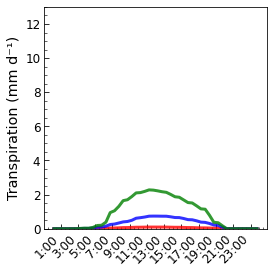

In [64]:
savefig=False
plot_TS=True
plot_DC=True

varlist=['tran']#, 'sens', 't2m', 'q2m']
mins=[0,-150,15,0]
maxs=[13,420,35,15]

# varlist=['wind_speed_10m', 'wind_direction_10m']
# mins=[0,0]
# maxs=[8,360]

# varlist=['SWdnSFC', 'LWdnSFC']

ds1= cen_orc_noirr
ds2= cen_orc_irr100
ds3= cen_orc_routingfull_beta1


ds_list= [ds1, ds2, ds3]


for ds in ds_list:
    # ds['tran'] = ds['tran'] /( 3600 /24)
    ds['tran'].attrs['long_name'] = 'Transpiration'
    # ds['tran'].attrs['units'] = 'mm/d'


# ds_list=[ds6, ds3, cen_lmdz_routingfull_beta1_nudged]

title='off'

#TS
# for var in varlist:
#     if not plot_TS:
#         break
#     ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
#     # vmin=mins[varlist.index(var)]
#     # vmax=maxs[varlist.index(var)]
#     vmin,vmax=None, None
#     time_series_ave(ds_list, var, 
#                     vmin=vmin, vmax=vmax,
#                     title=title,
#                     legend_out=None,
#                     xlabel='Date',
#                     ylabel=ylabel,
#                     ds_colors=True,
#                     figsize=(7, 4),
#                     envelope=False
#                     )
#     if savefig:
#         plt.savefig(f'figures/chap6/SOP_TS_DC/time_series_cendrosa_{var}.png', dpi=300)

#DC
for var in varlist:
    if not plot_DC:
        break
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=mins[varlist.index(var)]
    vmax=maxs[varlist.index(var)]
    # vmin,vmax=None, None
    diurnal_cycle_ave(ds_list, var,
                     vmin=vmin, vmax=vmax,
                     title=title,
                     legend_out=None,
                    #  xlabel='Time (UTC)',
                     ylabel=ylabel,
                     ds_colors=True,
                    figsize=(4,4),
                    envelope=True
                     )
    # if savefig:
    #     plt.savefig(f'figures/chap6/SOP_TS_DC/diurnal_cycle_cendrosa_{var}.png', dpi=300, bbox_inches='tight')

### Els Plans

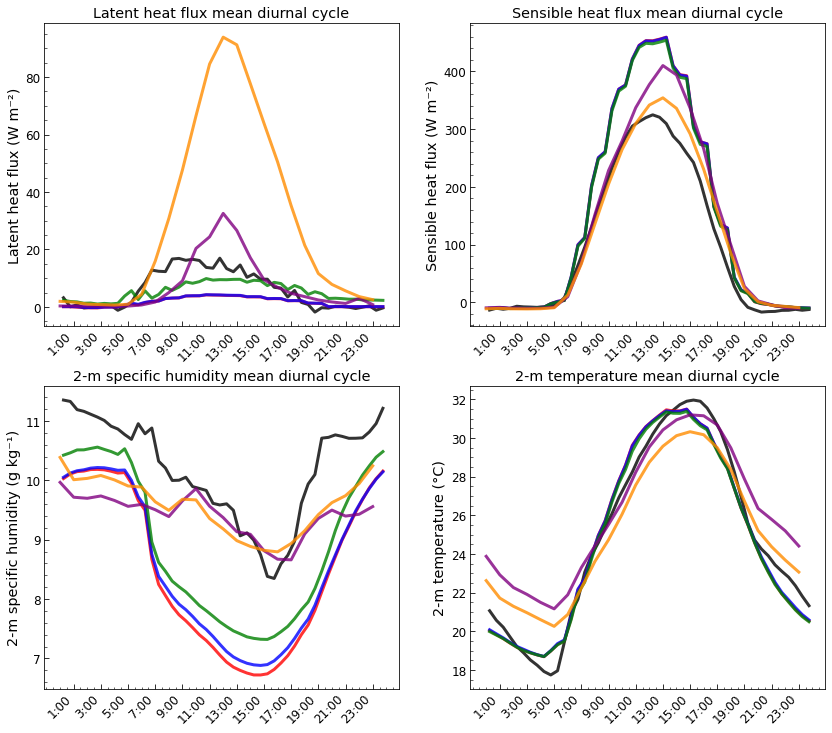

In [69]:
varlist=['flat', 'sens', 'q2m', 't2m']
# mins=[-10,-100,6,15 ]
# maxs=[520,420,12,35]
titles=['Latent heat flux mean diurnal cycle', 
        'Sensible heat flux mean diurnal cycle',
        '2-m specific humidity mean diurnal cycle',
        '2-m temperature mean diurnal cycle']

fig, axes = plt.subplots(2,2, figsize=(14,12))
axes=axes.flatten()

ds1= els_lmdz_noirr
ds2= els_lmdz_irr100
ds3= els_lmdz_routingfull_beta1
ds4=mesoNH_elsplans_cell
ds4.attrs['show_envelope'] = True
ds5=mesoNH_elsplans_exact
ds6=restrict_els_mto
# ds_list= [ds6, ds1, ds2, ds3, ds5, ds4]  

ds_list=[ds6]
ds_list=[ds6, ds1]
ds_list=[ds6, ds1, ds2]
ds_list=[ds6, ds1, ds2, ds3]
ds_list=[ds6, ds1, ds2, ds3, ds5, ds4]
# ds_list=[ds6, ds1, ds2, ds3, ds5, ds4]

for var in varlist:
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    title=titles[varlist.index(var)]
    vmin=mins[varlist.index(var)]
    vmax=maxs[varlist.index(var)]
    # vmin,vmax=None, None
    ax= axes[varlist.index(var)]
    diurnal_cycle_ave(ds_list, var, ax=ax,
                    #  vmin=vmin, vmax=vmax,
                     title=title,
                     legend_out=None,
                    #  xlabel='Time (UTC)',
                     ylabel=ylabel,
                     ds_colors=True,
                     envelope=False
                     )

In [ ]:
savefig=False
plot_TS=True
plot_DC=True

varlist=['flat', 'sens', 't2m', 'q2m']
# varlist=['wind_speed_10m', 'wind_direction_10m']
# varlist=['SWdnSFC', 'LWdnSFC']

mins=[0,-150,15,0]
maxs=[520,420,35,0.015]
# mins=[0, 0]
# maxs=[8, 360]
# varlist=stop


ds1= els_lmdz_noirr
ds2= els_lmdz_irr100
ds3= els_lmdz_routingfull_beta1
ds4=mesoNH_elsplans_cell
ds4.attrs['show_envelope'] = True
ds5=mesoNH_elsplans_exact
ds6=restrict_els_mto
ds_list= [ds6, ds1, ds2, ds3, ds5, ds4]

ds_list=[ds6, ds3, els_lmdz_routingfull_beta1_nudged]


title='off'
#TS
# mins=[0,-150,15,0]
# maxs=[700,450,35,0.015]
for var in varlist:
    if not plot_TS:
        break
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=mins[varlist.index(var)]
    vmax=maxs[varlist.index(var)]
    vmin,vmax=None, None
    time_series_ave(ds_list, var, 
                    # vmin=vmin, vmax=vmax,
                    title=title,
                    legend_out=None,
                    xlabel='Date',
                    ylabel=ylabel,
                    ds_colors=True,
                    figsize=(7, 4),
                    envelope=False
                    )
    if savefig:
        plt.savefig(f'figures/chap6/SOP_TS_DC/time_series_elsplans_{var}.png', dpi=300)
#DC
for var in varlist:
    if not plot_DC:
        break
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=mins[varlist.index(var)]
    vmax=maxs[varlist.index(var)]
    # vmin,vmax=None, None
    diurnal_cycle_ave(ds_list, var,
                     vmin=vmin, vmax=vmax,
                     title=title,
                     legend_out=True,
                    #  xlabel='Time (UTC)',
                     ylabel=ylabel,
                     ds_colors=True,
                    figsize=(4,4),
                    envelope=True
                     )
    if savefig:
        plt.savefig(f'figures/chap6/SOP_TS_DC/diurnal_cycle_elsplans_{var}.png', dpi=300, bbox_inches='tight')

### Irrigation

In [ ]:
savefig=True
plot_TS=True
plot_DC=True
elsPlans=True

varlist=['netirrig','irrigation', 'evapnu', 'tran']

ds1= cen_orc_irr100
ds2= cen_orc_routingfull_beta1
ds3= els_orc_irr100
ds4= els_orc_routingfull_beta1
ds_list1= [ds1, ds2]
ds_list2= [ds3, ds4]

# ds_list1=[ds2, cen_orc_routingfull_beta1_nudged]

title='off'

#TS
mins=[0,-150,15,0]
maxs=[700,450,35,0.015]
for var in varlist:
    if not plot_TS:
        break
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=mins[varlist.index(var)]
    vmax=maxs[varlist.index(var)]
    vmin,vmax=None, None
    time_series_ave(ds_list1, var, vmin=vmin, vmax=vmax, title=title,legend_out=None,xlabel='Date',ylabel=ylabel,ds_colors=True,figsize=(7, 4),envelope=False
                    )
    if savefig:
        plt.savefig(f'figures/chap6/SOP_TS_DC/time_series_cendrosa_{var}.png', dpi=300)
    
    if elsPlans:
        time_series_ave(ds_list2, var, vmin=vmin, vmax=vmax, title=title,legend_out=None,xlabel='Date',ylabel=ylabel,ds_colors=True,figsize=(7, 4),envelope=False
                    )
        if savefig:
            plt.savefig(f'figures/chap6/SOP_TS_DC/time_series_elsplans_{var}.png', dpi=300)

#DC
for var in varlist:
    if not plot_DC:
        break
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=mins[varlist.index(var)]
    vmax=maxs[varlist.index(var)]
    vmin,vmax=None, None
    diurnal_cycle_ave(ds_list1, var, vmin=vmin, vmax=vmax, title=title, legend_out=True,
                      #  xlabel='Time (UTC)',
                      ylabel=ylabel, ds_colors=True,figsize=(4,4),envelope=True
                     )
    if savefig:
        plt.savefig(f'figures/chap6/SOP_TS_DC/diurnal_cycle_cendrosa_{var}.png', dpi=300, bbox_inches='tight')

    if elsPlans:
        diurnal_cycle_ave(ds_list2, var, vmin=vmin, vmax=vmax, title=title, legend_out=True,
                          #  xlabel='Time (UTC)', 
                          ylabel=ylabel, ds_colors=True,figsize=(4,4),envelope=True
                     )
        if savefig:
            plt.savefig(f'figures/chap6/SOP_TS_DC/diurnal_cycle_elsplans_{var}.png', dpi=300, bbox_inches='tight')

### Times series to characterize obs days

In [ ]:
savefig=False

varlist=['flat', 'sens', 't2m', 'q2m', 'SWdnSFC', 'LWdnSFC', 'psol','wind_speed_10m', 'wind_direction_10m']
varlist=['precip']

ds1=restrict_cen_mto
ds2=restrict_els_mto
#restrict to period between 15 and 27 July
ds1=ds1.sel(time=slice('2021-07-15', '2021-07-27'))
ds2=ds2.sel(time=slice('2021-07-15', '2021-07-27'))
ds1.attrs['plot_color']='green'
ds2.attrs['plot_color']='brown'
ds1.attrs['name']='Cendrosa obs'
ds2.attrs['name']='Els Plans obs'
ds_list= [ds1, ds2]

title='off'

#TS
mins=[0,-150,15,0]
maxs=[700,450,35,0.015]
for var in varlist:
    ylabel = var + ' (' + ds1[var].attrs['units'] + ')'
    # vmin=mins[varlist.index(var)]
    # vmax=maxs[varlist.index(var)]
    vmin,vmax=None, None
    time_series_ave(ds_list, var, 
                    # vmin=vmin, vmax=vmax,
                    title=title,
                    legend_out=None,
                    xlabel='Date',
                    ylabel=ylabel,
                    ds_colors=True,
                    figsize=(7, 4),
                    envelope=False,
                    # ds_linestyle=True
                    )
    if savefig:
        plt.savefig(f'figures/chap6/SOP_TS_DC/time_series_obs_{var}.png', dpi=300)


ds1.attrs['plot_color']='black'
ds2.attrs['plot_color']='black'
ds1.attrs['name']='obs'
ds2.attrs['name']='obs'

In [ ]:
savefig=False

varlist=['flat', 'sens', 't2m', 'q2m', 'SWdnSFC', 'LWdnSFC', 'psol','wind_speed_10m', 'wind_direction_10m']
varlist=['flat']

ds1=sop_cen_lmdz_routingfull_beta1
ds2=sop_els_lmdz_routingfull_beta1
#restrict to period between 15 and 27 July
# ds1=ds1.sel(time=slice('2021-07-15', '2021-07-27'))
# ds2=ds2.sel(time=slice('2021-07-15', '2021-07-27'))
ds1.attrs['plot_color']='green'
ds2.attrs['plot_color']='brown'
ds1.attrs['name']='Cendrosa'
ds2.attrs['name']='Els Plans'
ds_list= [ds1, ds2]

title='off'

#TS
mins=[0,-150,15,0]
maxs=[700,450,35,0.015]
for var in varlist:
    ylabel = var + ' (' + ds1[var].attrs['units'] + ')'
    # vmin=mins[varlist.index(var)]
    # vmax=maxs[varlist.index(var)]
    vmin,vmax=None, None
    time_series_ave(ds_list, var, 
                    # vmin=vmin, vmax=vmax,
                    title=title,
                    legend_out=None,
                    xlabel='Date',
                    ylabel=ylabel,
                    ds_colors=True,
                    figsize=(7, 4),
                    envelope=False,
                    # ds_linestyle=True
                    )
    if savefig:
        plt.savefig(f'figures/chap6/SOP_TS_DC/time_series_obs_{var}.png', dpi=300)

# ds1.attrs['plot_color']='black'
# ds2.attrs['plot_color']='black'
# ds1.attrs['name']='obs'
# ds2.attrs['name']='obs'

## Vertical profiles over both sites

In [ ]:
#basic profiles at 12UTC with q25 and q75
savefig=True

profiles_cendrosa=True
profiles_elsplans=True

ds1=iop_cen_lmdz_noirr
ds2=iop_cen_lmdz_irr100
ds3=iop_cen_lmdz_routingfull_beta1
ds4=iop_els_lmdz_noirr
ds5=iop_els_lmdz_irr100
ds6=iop_els_lmdz_routingfull_beta1
ds7= iop_cen_mesoNH_4D_cell_mean
ds8= iop_cen_mesoNH_4D_exact
ds9= iop_els_mesoNH_4D_cell_mean
ds10= iop_els_mesoNH_4D_exact
ds11= iop_cen_mesoNH_4D_cell_q25
ds12= iop_cen_mesoNH_4D_cell_q75
ds13= iop_els_mesoNH_4D_cell_q25
ds14= iop_els_mesoNH_4D_cell_q75

days=['1507']#,'2007']
# days=['1507', '1607', '1707', '2007', '2107', '2207', '2707']
# times=[5.25,9.25,13.25, 17.25]
times=[12.25]

vars=['theta', 'ovap']#, 'wind_speed', 'wind_direction']
show_yticklabels_list=[True, False, False, False]
ylabels=[None, False, False, False]
vmins=[295, 0, 0, 0, None]
vmaxs=[312, 11, 10, 360, None]
xlabels=['Potential temperature (K)', 
         'Specific humidity (g kg⁻¹)', 
         'Wind speed (m s⁻¹)', 
         'Wind direction (°N)']
plot_quantiles=False

# vars=['wind_speed', 'wind_direction']
# vmins=[0, 0]
# vmaxs=[10, 360]
# xlabels=['Wind speed (m s⁻¹)', 'Wind direction (°)']
# plot_quantiles=True

altmax=3000

for i,var in enumerate(vars):
    xmin, xmax = vmins[i], vmaxs[i]
    xlabel = xlabels[i]
    ylabel=ylabels[i]
    show_yticklabels=show_yticklabels_list[i]
    for day in days:    
        if profiles_cendrosa:
            obs_dict=cen_RS[day]
            ds_list_lmdz = [ds1[day], ds2[day], ds3[day]]
            ds_list_mesoNH = [ds7[day]]#, ds8[day]]
            # ds_list_lmdz = [ds1[day], ds2[day], ds3[day]]
            # ds_list_mesoNH = []
            quantiles, quantiles_color = [ds11[day], ds12[day]], 'darkorange'
            if not plot_quantiles:
                quantiles, quantiles_color = None, None
            profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                            # title='La Cendrosa at 12UTC', 
                                            ds_list_mesoNH=ds_list_mesoNH,
                                            altmax=altmax, xmin=xmin, xmax=xmax, 
                                            # nbins=5,
                                            substract_gl=True,
                                            simfreq='30mn',
                                            xlabel=xlabel,
                                            ylabel=ylabel,
                                            quantiles=quantiles,
                                            quantiles_color=quantiles_color,
                                            show_yticklabels=show_yticklabels,
                                            show_legend=False
                                            )
            if savefig:
                plt.savefig(f'figures/chap6/profiles/profile_cendrosa_{var}_{day}_.png', dpi=300, bbox_inches='tight')

        if profiles_elsplans:
            obs_dict=els_RS[day]
            ds_list_lmdz = [ds4[day], ds5[day], ds6[day]]
            ds_list_mesoNH = [ds9[day]]#, ds10[day]]
            # ds_list_lmdz = [ds4[day], ds5[day], ds6[day]]
            # ds_list_mesoNH = []
            quantiles, quantiles_color = [ds13[day], ds14[day]], 'darkorange'
            if not plot_quantiles:
                quantiles, quantiles_color = None, None
            profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                            # title='Els Plans at 12UTC', 
                                            ds_list_mesoNH=ds_list_mesoNH,
                                            altmax=altmax, xmin=xmin, xmax=xmax, 
                                            # nbins=5,
                                            substract_gl=True,
                                            simfreq='30mn',
                                            xlabel=xlabel,
                                            ylabel=ylabel,
                                            quantiles=quantiles,
                                            quantiles_color=quantiles_color,
                                            show_yticklabels=show_yticklabels,
                                            show_legend=False
                                            )
            if savefig:
                plt.savefig(f'figures/chap6/profiles/profile_elsplans_{var}_{day}_.png', dpi=300, bbox_inches='tight')   

In [ ]:
#vertical profiles for previous hours on IOP days
savefig=False

profiles_cendrosa=True
profiles_elsplans=False

ds1=iop_cen_lmdz_noirr
ds2=iop_cen_lmdz_irr100
ds3=iop_cen_lmdz_routingfull_beta1
ds4=iop_els_lmdz_noirr
ds5=iop_els_lmdz_irr100
ds6=iop_els_lmdz_routingfull_beta1
ds7= iop_cen_mesoNH_4D_cell_mean
ds8= iop_cen_mesoNH_4D_exact
ds9= iop_els_mesoNH_4D_cell_mean
ds10= iop_els_mesoNH_4D_exact
ds11= iop_cen_mesoNH_4D_cell_q25
ds12= iop_cen_mesoNH_4D_cell_q75
ds13= iop_els_mesoNH_4D_cell_q25
ds14= iop_els_mesoNH_4D_cell_q75

# days=['1507','2007']
days=['1507']
times=[8.25, 9.25, 10.25, 11.25, 12.25]#, 13.25, 14.25, 15.25, 16.25, 17.25]
times=[12.25]

vars=['theta', 'ovap']#, 'wind_speed', 'wind_direction']
show_yticklabels_list=[False, False, False, False]
ylabels=[False, False, False, False]
vmins=[295, 2, 0, 0, None]
vmaxs=[312, 10, 10, 360, None]
xlabels=['Potential temperature (K)', 
         'Specific humidity (g kg⁻¹)', 
         'Wind speed (m s⁻¹)', 
         'Wind direction (°N)']
plot_quantiles=False

altmax=3000

for i,var in enumerate(vars):
    xmin, xmax = vmins[i], vmaxs[i]
    xlabel = xlabels[i]
    ylabel=ylabels[i]
    show_yticklabels=show_yticklabels_list[i]
    for day in days:    
        if profiles_cendrosa:
            obs_dict=cen_RS[day]
            ds_list_lmdz = [ds1[day], ds2[day], ds3[day]]
            ds_list_mesoNH = [ds7[day], ds8[day]]
            quantiles, quantiles_color = [ds11[day], ds12[day]], 'darkorange'
            if not plot_quantiles:
                quantiles, quantiles_color = None, None
            profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                            # title=title, 
                                            ds_list_mesoNH=ds_list_mesoNH,
                                            altmax=altmax, xmin=xmin, xmax=xmax, 
                                            # nbins=5,
                                            substract_gl=True,
                                            simfreq='30mn',
                                            xlabel=xlabel,
                                            ylabel=ylabel,
                                            quantiles=quantiles,
                                            quantiles_color=quantiles_color,
                                            show_yticklabels=show_yticklabels
                                            )
            if savefig:
                plt.savefig(f'figures/chap6/profiles/profile_cendrosa_{var}_{day}_times.png', dpi=300, bbox_inches='tight')

        if profiles_elsplans:
            obs_dict=els_RS[day]
            ds_list_lmdz = [ds4[day], ds5[day], ds6[day]]
            ds_list_mesoNH = [ds9[day], ds10[day]]
            quantiles, quantiles_color = [ds13[day], ds14[day]], 'darkorange'
            if not plot_quantiles:
                quantiles, quantiles_color = None, None
            profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                            # title=title, 
                                            ds_list_mesoNH=ds_list_mesoNH,
                                            altmax=altmax, xmin=xmin, xmax=xmax, 
                                            # nbins=5,
                                            substract_gl=True,
                                            simfreq='30mn',
                                            xlabel=xlabel,
                                            ylabel=ylabel,
                                            quantiles=quantiles,
                                            quantiles_color=quantiles_color,
                                            show_yticklabels=show_yticklabels
                                            )
            if savefig:
                plt.savefig(f'figures/chap6/profiles/profile_elsplans_{var}_{day}_morning.png', dpi=300, bbox_inches='tight')   

In [ ]:
#vertical profiles with q5 and q95 instead of q25 and q75
savefig=True

profiles_cendrosa=True
profiles_elsplans=True

ds1=iop_cen_lmdz_noirr
ds2=iop_cen_lmdz_irr100
ds3=iop_cen_lmdz_routingfull_beta1
ds4=iop_els_lmdz_noirr
ds5=iop_els_lmdz_irr100
ds6=iop_els_lmdz_routingfull_beta1
ds7= iop_cen_mesoNH_4D_cell_mean
ds8= iop_cen_mesoNH_4D_exact
ds9= iop_els_mesoNH_4D_cell_mean
ds10= iop_els_mesoNH_4D_exact
ds11= iop_cen_mesoNH_4D_cell_q5
ds12= iop_cen_mesoNH_4D_cell_q95
ds13= iop_els_mesoNH_4D_cell_q5
ds14= iop_els_mesoNH_4D_cell_q95

days=['1507','2007']
times=[12.25]

vars=['theta', 'ovap', 'wind_speed', 'wind_direction']
show_yticklabels_list=[True, False, False, False]
ylabels=[None, False, False, False]
vmins=[290, 0, 0, 0, None]
vmaxs=[312, 11, 10, 360, None]
xlabels=['Potential temperature (K)', 
         'Specific humidity (g kg⁻¹)', 
         'Wind speed (m s⁻¹)', 
         'Wind direction (°N)']
plot_quantiles=True

altmax=3000

for i,var in enumerate(vars):
    xmin, xmax = vmins[i], vmaxs[i]
    xlabel = xlabels[i]
    ylabel=ylabels[i]
    show_yticklabels=show_yticklabels_list[i]
    for day in days:    
        if profiles_cendrosa:
            obs_dict=cen_RS[day]
            ds_list_lmdz = [ds1[day], ds2[day], ds3[day]]
            ds_list_mesoNH = [ds7[day], ds8[day]]
            quantiles, quantiles_color = [ds11[day], ds12[day]], 'darkorange'
            if not plot_quantiles:
                quantiles, quantiles_color = None, None
            profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                            # title=title, 
                                            ds_list_mesoNH=ds_list_mesoNH,
                                            altmax=altmax, xmin=xmin, xmax=xmax, 
                                            # nbins=5,
                                            substract_gl=True,
                                            simfreq='30mn',
                                            xlabel=xlabel,
                                            ylabel=ylabel,
                                            quantiles=quantiles,
                                            quantiles_color=quantiles_color,
                                            show_yticklabels=show_yticklabels
                                            )
            if savefig:
                plt.savefig(f'figures/chap6/profiles/profile_cendrosa_{var}_{day}_extremes.png', dpi=300, bbox_inches='tight')

        if profiles_elsplans:
            obs_dict=els_RS[day]
            ds_list_lmdz = [ds4[day], ds5[day], ds6[day]]
            ds_list_mesoNH = [ds9[day], ds10[day]]
            quantiles, quantiles_color = [ds13[day], ds14[day]], 'darkorange'
            if not plot_quantiles:
                quantiles, quantiles_color = None, None
            profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                            # title=title, 
                                            ds_list_mesoNH=ds_list_mesoNH,
                                            altmax=altmax, xmin=xmin, xmax=xmax, 
                                            # nbins=5,
                                            substract_gl=True,
                                            simfreq='30mn',
                                            xlabel=xlabel,
                                            ylabel=ylabel,
                                            quantiles=quantiles,
                                            quantiles_color=quantiles_color,
                                            show_yticklabels=show_yticklabels
                                            )
            if savefig:
                plt.savefig(f'figures/chap6/profiles/profile_elsplans_{var}_{day}_extremes.png', dpi=300, bbox_inches='tight')   

In [ ]:
#vertical profiles with mesoNH_sens subdatasets
savefig=True

profiles_cendrosa=True
profiles_elsplans=True

ds1=iop_cen_lmdz_noirr
ds2=iop_cen_lmdz_irr100
ds3=iop_cen_lmdz_routingfull_beta1
ds4=iop_els_lmdz_noirr
ds5=iop_els_lmdz_irr100
ds6=iop_els_lmdz_routingfull_beta1
ds7= iop_cen_mesoNH_4D_cell_mean
ds8= iop_cen_mesoNH_4D_exact
ds9= iop_els_mesoNH_4D_cell_mean
ds10= iop_els_mesoNH_4D_exact
ds11= iop_cen_mesoNH_4D_cell_q25
ds12= iop_cen_mesoNH_4D_cell_q75
ds13= iop_els_mesoNH_4D_cell_q25
ds14= iop_els_mesoNH_4D_cell_q75

# ds15 = mesoNH_cendrosa_1507_sens_mean
# ds15 = mesoNH_cendrosa_2007_sens_mean
# ds16 = mesoNH_elsplans_1507_sens_mean
# ds16 = mesoNH_elsplans_2007_sens_mean

days=['1507']
ds15 = mesoNH_cendrosa_1507_minsens_mean
ds16 = mesoNH_elsplans_1507_minsens_mean
ds17 = mesoNH_cendrosa_1507_maxsens_mean
ds18 = mesoNH_elsplans_1507_maxsens_mean
show_yticklabels_list=[True, False, True, False]
ylabels=[None, False, None, False]

# days=['2007']
# ds15 = mesoNH_cendrosa_2007_minsens_mean
# ds16 = mesoNH_elsplans_2007_minsens_mean
# ds17 = mesoNH_cendrosa_2007_maxsens_mean
# ds18 = mesoNH_elsplans_2007_maxsens_mean
# show_yticklabels_list=[False, False, False, False]
# ylabels=[False, False, False, False]

# days=['1507', '1607', '1707', '2007', '2107', '2207', '2707']
# times=[5.25,9.25,13.25, 17.25]
times=[12.25]

vars=['theta', 'ovap']#, 'wind_speed', 'wind_direction']
vmins=[295, 0, 0, 0, None]
vmaxs=[312, 11, 10, 360, None]
xlabels=['Potential temperature (K)', 
         'Specific humidity (g kg⁻¹)', 
         'Wind speed (m s⁻¹)', 
         'Wind direction (°)']
plot_quantiles=False

# vars=['wind_speed', 'wind_direction']
# vmins=[0, 0]
# vmaxs=[10, 360]
# xlabels=['Wind speed (m s⁻¹)', 'Wind direction (°)']
# plot_quantiles=False

altmax=3000

for i,var in enumerate(vars):
    xmin, xmax = vmins[i], vmaxs[i]
    xlabel = xlabels[i]
    ylabel = ylabels[i]
    show_yticklabels = show_yticklabels_list[i]
    for day in days:    
        if profiles_cendrosa:
            obs_dict=cen_RS[day]
            ds_list_lmdz = [ds1[day], ds2[day], ds3[day]]
            ds_list_mesoNH = [ds7[day], ds8[day], ds15, ds17]
            ds_list_mesoNH = [ds7[day], ds15, ds17]
            quantiles, quantiles_color = [ds11[day], ds12[day]], 'darkorange'
            if not plot_quantiles:
                quantiles, quantiles_color = None, None
            profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                            # title=title, 
                                            ds_list_mesoNH=ds_list_mesoNH,
                                            altmax=altmax, xmin=xmin, xmax=xmax, 
                                            # nbins=5,
                                            substract_gl=True,
                                            simfreq='30mn',
                                            xlabel=xlabel,
                                            ylabel=ylabel,
                                            quantiles=quantiles,
                                            quantiles_color=quantiles_color,
                                            ds_linestyle=True,
                                            show_yticklabels=show_yticklabels,
                                            show_legend=False
                                            )
            if savefig:
                plt.savefig(f'figures/chap6/profiles/profile_cendrosa_{var}_{day}_sensbins.png', dpi=300, bbox_inches='tight')

        if profiles_elsplans:
            obs_dict=els_RS[day]
            ds_list_lmdz = [ds4[day], ds5[day], ds6[day]]
            ds_list_mesoNH = [ds9[day], ds10[day], ds16, ds18]
            ds_list_mesoNH = [ds9[day], ds16, ds18]
            quantiles, quantiles_color = [ds13[day], ds14[day]], 'darkorange'
            if not plot_quantiles:
                quantiles, quantiles_color = None, None
            profile_altitude_multipletimes_obs(ds_list_lmdz, obs_dict, var, times, 
                                            # title=title, 
                                            ds_list_mesoNH=ds_list_mesoNH,
                                            altmax=altmax, xmin=xmin, xmax=xmax, 
                                            # nbins=5,
                                            substract_gl=True,
                                            simfreq='30mn',
                                            xlabel=xlabel,
                                            ylabel=ylabel,
                                            quantiles=quantiles,
                                            quantiles_color=quantiles_color,
                                            show_yticklabels=show_yticklabels,
                                            show_legend=False
                                            )
            if savefig:
                plt.savefig(f'figures/chap6/profiles/profile_elsplans_{var}_{day}_sensbins.png', dpi=300, bbox_inches='tight')   

In [ ]:
var='ground_level'

ds_list=[cen_lmdz_noirr, cen_lmdz_irr100, cen_lmdz_routingfull_beta1,
         els_lmdz_noirr, els_lmdz_irr100, els_lmdz_routingfull_beta1]
time_series_ave(ds_list, var)

## Maps

In [ ]:
lon_min_mesoNH, lon_max_mesoNH, lat_min_mesoNH, lat_max_mesoNH = -3.4, 4, 40.5, 43.5
lat_min_mesoNH_zoom, lat_max_mesoNH_zoom, lon_min_mesoNH_zoom, lon_max_mesoNH_zoom = 41., 42, 0., 1.5
lat_min_mesoNH_small, lat_max_mesoNH_small, lon_min_mesoNH_small, lon_max_mesoNH_small = 41.34, 41.8, 0.51, 1.4
lat_min_mesoNH_smaller, lat_max_mesoNH_smaller, lon_min_mesoNH_smaller, lon_max_mesoNH_smaller = 41.34, 41.8, 0.51, 1.2

figsize_mesoNH=(10.5, 4)

In [ ]:
#load LMDZ mappable file
sim='sim2931'
lmdz_routingfull_beta1_mappable_file = '{}/{}_20210701_20210731_HF_histhf.nc'.format(boost_irrig_dir, sim)
lmdz_routingfull_beta1_mappable = format_lmdz_HF(lmdz_routingfull_beta1_mappable_file, color='green', name='irr_boost')
lmdz_routingfull_beta1_mappable = lmdz_routingfull_beta1_mappable.sel(time=slice('2021-07-14', '2021-07-30'))   

vars=['temp', 'geoph', 'vitu', 'vitv']
levels=[85000, 70000, 50000]
for var in vars:
    for level in levels:
        lmdz_routingfull_beta1_mappable = extract_var_presniv(lmdz_routingfull_beta1_mappable, var, level)
rename_dict={   'vitu_850':'u850',
                'vitv_850':'v850',
                'vitu_700':'u700',
                'vitv_700':'v700',
                'vitu_500':'u500',
                'vitv_500':'v500',
            }
lmdz_routingfull_beta1_mappable = lmdz_routingfull_beta1_mappable.rename(rename_dict)
# lmdz_routingfull_beta1_mappable

In [ ]:
timestamps=['2021-07-15T12:00:00', '2021-07-20T12:00:00']

### Sensible heat flux

In [ ]:
wet_dry = ListedColormap(mpl.colormaps['RdYlGn_r'](np.linspace(0, 1, 10)))
wet_dry

In [ ]:
wet_dry2 = ListedColormap(mpl.colormaps['BrBG_r'](np.linspace(0, 1, 10)))
wet_dry2

In [ ]:
#sensible heat flux map at 12UTC
savefig=True
var='sens'
vmin=-0
vmax= 500
# vmin,vmax=None, None
lon_min=lon_min_mesoNH_smaller
lon_max=lon_max_mesoNH_smaller
lat_min=lat_min_mesoNH_smaller
lat_max=lat_max_mesoNH_smaller
cmap=wet_dry2
title='Surface sensible heat flux at 12UTC (MesoNH)'
label='Surface sensible heat flux (W m⁻²)'
for timestamp in timestamps:
        map_mesoNH_timestamp_restrict(mesoNH, var, add_liaise=True, timestamp=timestamp,
                                vmin=vmin, vmax=vmax, cmap=cmap,
                                poly=both_cells,
                                lon_min=lon_min, lon_max=lon_max,
                                lat_min=lat_min, lat_max=lat_max,
                                title=title,
                                figsize=figsize_mesoNH,
                                label=label
                                )
        if savefig:
            plt.savefig(f'figures/chap6/IOP_maps/mesoNH_{var}_{timestamp[0:10]}_{timestamp[11:13]}UTC.png', dpi=300, bbox_inches='tight')

### Wind maps

In [ ]:
# meso NH wind
savefig=False
timestamps=['2021-07-15T12:00:00', '2021-07-20T12:00:00']
heights=['10m', '950', '900', '850']
ds1=mesoNH
cmap=wind_cmap
# vmin=1500
# vmax=3100
vmin=0
vmax=8
# vmin,vmax=None, None
for timestamp in timestamps:
    for height in heights:
        ds2=ds1.sel(time=timestamp, method='nearest')
        map_wind_mesoNH(ds2, 
                # extra_var='psol', extra_ds=ds2,
                figsize=figsize_mesoNH,  cmap=cmap,  vmin=vmin, vmax=vmax,
                height=height,
                clabel='Wind speed (m s⁻¹)',
                dist=2,
                scale=50,
                title=' ',
                lon_min=lon_min_mesoNH_smaller, lon_max=lon_max_mesoNH_smaller,
                lat_min=lat_min_mesoNH_smaller, lat_max=lat_max_mesoNH_smaller,
                )
        add_liaise_site_loc()
        if savefig:
            plt.savefig(f'figures/chap6/IOP_maps/mesoNH_wind_{height}_{timestamp}.png', dpi=300, bbox_inches='tight')    

In [ ]:
# meso NH wind
savefig=False
timestamps=['2021-07-15T12:00:00', '2021-07-20T12:00:00']
heights=['10m']
ds1=mesoNH
cmap=wind_cmap
# vmin=1500
# vmax=3100
vmin=0
vmax=8
# vmin,vmax=None, None
for timestamp in timestamps:
    for height in heights:
        ds2=ds1.sel(time=timestamp, method='nearest')
        map_wind_mesoNH(ds2, 
                # extra_var='psol', extra_ds=ds2,
                figsize=figsize_mesoNH,  cmap=cmap,  vmin=vmin, vmax=vmax,
                height=height,
                clabel='Wind speed (m s⁻¹)',
                dist=2,
                scale=50,
                title='10-m wind speed at 12UTC (MesoNH)',
                lon_min=lon_min_mesoNH_smaller, lon_max=lon_max_mesoNH_smaller,
                lat_min=lat_min_mesoNH_smaller, lat_max=lat_max_mesoNH_smaller,
                )
        add_liaise_site_loc()
        if savefig:
            plt.savefig(f'figures/chap6/IOP_maps/mesoNH_wind_{height}_{timestamp}.png', dpi=300, bbox_inches='tight')    

In [ ]:
# meso NH vertical wind
savefig=True
timestamps=['2021-07-15T12:00:00', '2021-07-20T12:00:00']
heights=['10m', '950', '900', '850']
ds1=mesoNH
cmap=emb8
# vmin=1500
# vmax=3100
vmin=-1
vmax= 1
# vmin,vmax=None, None
for timestamp in timestamps:
    for height in heights:
        ds2=ds1.sel(time=timestamp, method='nearest')
        map_mesoNH_mean_restrict(ds2, 
                var='w'+height,
                # figsize=figsize_mesoNH,  
                cmap=cmap,  vmin=vmin, vmax=vmax,
                label='Vertical wind speed (m s⁻¹)',
                title=' ',
                lon_min=lon_min_mesoNH_smaller, lon_max=lon_max_mesoNH_smaller,
                lat_min=lat_min_mesoNH_smaller, lat_max=lat_max_mesoNH_smaller,
                poly=both_cells,
                )
        add_liaise_site_loc()
        if savefig:
            plt.savefig(f'figures/chap6/IOP_maps/mesoNH_vertwind_{height}_{timestamp}.png', dpi=300, bbox_inches='tight')    

In [ ]:
# lmdz wind at 12UTC on IOP days
savefig=True
lat_min_mesoNH_zoom2, lat_max_mesoNH_zoom2, lon_min_mesoNH_zoom2, lon_max_mesoNH_zoom2 = 40.5, 42.5, -1, 2.5

ds1=lmdz_routingfull_beta1_mappable
lon_min=lon_min_mesoNH_zoom2
lon_max=lon_max_mesoNH_zoom2
lat_min=lat_min_mesoNH_zoom2
lat_max=lat_max_mesoNH_zoom2
ds1=ds1.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

cmap=wind_cmap
vmin, vmax= 0,8
# vmin,vmax=None, None

heights=['10m', '850']

for timestamp in timestamps:
    ds2=ds1.sel(time=timestamp, method='nearest')
    for height in heights:
        map_wind(ds2, 
            #     extra_var='geoph_850', extra_ds=ds2,
                figsize=figsize_mesoNH,  cmap=cmap,  vmin=vmin, vmax=vmax,
                height=height,
                dist=1,
                scale=50,
                title=' ',
                clabel='Wind speed (m s⁻¹)',
                xloc=8,
                yloc=5,
                n_ticks=9
                )
        add_liaise_site_loc()
        if savefig:
            plt.savefig(f'figures/chap6/IOP_maps/lmdz_wind{height}_{timestamp[0:10]}_{timestamp[11:13]}UTC.png', dpi=300, bbox_inches='tight')

## IOP time series

In [ ]:
# 15 Juillet La Cendrosa
savefig=True
start_date='2021-07-15'
end_date='2021-07-15'

varlist, plot_envelope=['flat'], True
vmins, vmaxs = [-50], [600]

# varlist, plot_envelope=['SWdnSFC', 'LWdnSFC', 'flat', 'sens', 't2m','q2m', 'wind_speed_10m', 'wind_direction_10m'], True
# varlist, plot_envelope=['wind_speed_10m', 'wind_direction_10m'], True
# vmins=[0,300,-50, -200, 12, 6, 0, 0]
# vmaxs=[1000,440, 600, 500, 37, 14, 9, 360]

ds1= cen_lmdz_noirr.sel(time=slice(start_date, end_date))
ds2= cen_lmdz_irr100.sel(time=slice(start_date, end_date))
ds3= cen_lmdz_routingfull_beta1.sel(time=slice(start_date, end_date))
ds4=mesoNH_cendrosa_cell.sel(time=slice(start_date, end_date))
ds4.attrs['show_envelope'] = True
ds5=mesoNH_cendrosa_exact.sel(time=slice(start_date, end_date))
ds6=restrict_cen_mto.sel(time=slice(start_date, end_date))
ds_list=[ds6, ds1, ds2, ds3, ds5, ds4]

title='off'

#TS
for var in varlist:
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=vmins[varlist.index(var)]
    vmax=vmaxs[varlist.index(var)]
    # vmin,vmax=None, None
    time_series_ave(ds_list, var, 
                    vmin=vmin, vmax=vmax,
                    title=title,
                    # legend_out=None,
                    legend_out=False,
                    xlabel='Time',
                    ylabel=ylabel,
                    ds_colors=True,
                    figsize=(7, 4),
                    envelope=plot_envelope,
                    single_day=True
                    )
    if savefig:
        plt.savefig(f'figures/chap6/IOP_TS/TS_{start_date}_cendrosa_{var}.png', dpi=300)


In [ ]:
#20 Juillet La Cendrosa
savefig=True
start_date='2021-07-20'
end_date='2021-07-20'

vmins=[0,300,-50, -200, 12, 6, 0, 0]
vmaxs=[1000,440, 600, 500, 37, 14, 9, 360]
# varlist, plot_envelope=['flat'], True
varlist, plot_envelope=['SWdnSFC', 'LWdnSFC','flat', 'sens', 't2m','q2m', 'wind_speed_10m', 'wind_direction_10m'], True


ds1= cen_lmdz_noirr.sel(time=slice(start_date, end_date))
ds2= cen_lmdz_irr100.sel(time=slice(start_date, end_date))
ds3= cen_lmdz_routingfull_beta1.sel(time=slice(start_date, end_date))
ds4=mesoNH_cendrosa_cell.sel(time=slice(start_date, end_date))
ds4.attrs['show_envelope'] = True
ds5=mesoNH_cendrosa_exact.sel(time=slice(start_date, end_date))
ds6=restrict_cen_mto.sel(time=slice(start_date, end_date))
ds_list= [ds6, ds1, ds2, ds3, ds5, ds4]  

title='off'

#TS
for var in varlist:
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=vmins[varlist.index(var)]
    vmax=vmaxs[varlist.index(var)]
    # vmin,vmax=None, None
    time_series_ave(ds_list, var, 
                    vmin=vmin, vmax=vmax,
                    title=title,
                    legend_out=None,
                    xlabel='Time',
                    ylabel=ylabel,
                    ds_colors=True,
                    figsize=(7, 4),
                    envelope=plot_envelope,
                    single_day=True
                    )
    if savefig:
        plt.savefig(f'figures/chap6/IOP_TS/TS_{start_date}_cendrosa_{var}.png', dpi=300)


In [ ]:
# 15 Juillet Els Plans
savefig=True
start_date='2021-07-15'
end_date='2021-07-15'

# varlist=['SWdnSFC', 'LWdnSFC', 'flat', 'sens', 't2m','q2m', 'wind_speed_10m', 'wind_direction_10m']
# plot_envelope=True
# vmins=[0,       300,    -20,    -20,    12,     6,      0,  0]
# vmaxs=[1000,    440,    100,    520,    37,     14,     10,  360]

varlist, plot_envelope=['flat'], True
vmins, vmaxs = [-20], [100]

ds1= els_lmdz_noirr.sel(time=slice(start_date, end_date))
ds2= els_lmdz_irr100.sel(time=slice(start_date, end_date))
ds3= els_lmdz_routingfull_beta1.sel(time=slice(start_date, end_date))
ds4=mesoNH_elsplans_cell.sel(time=slice(start_date, end_date))
ds4.attrs['show_envelope'] = True
ds5=mesoNH_elsplans_exact.sel(time=slice(start_date, end_date))
ds6=restrict_els_mto.sel(time=slice(start_date, end_date))
ds_list=[ds6, ds1, ds2, ds3, ds5, ds4]

title='off'

#TS
for var in varlist:
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=vmins[varlist.index(var)]
    vmax=vmaxs[varlist.index(var)]
    # vmin,vmax=None, None
    time_series_ave(ds_list, var, 
                    vmin=vmin, vmax=vmax,
                    title=title,
                    # legend_out=None,
                    legend_out=False,
                    xlabel='Time',
                    ylabel=ylabel,
                    ds_colors=True,
                    figsize=(7, 4),
                    envelope=plot_envelope,
                    single_day=True
                    )
    if savefig:
        plt.savefig(f'figures/chap6/IOP_TS/TS_{start_date}_elsplans_{var}.png', dpi=300)


In [ ]:
# 20 Juillet Els Plans
savefig=True
start_date='2021-07-20'
end_date='2021-07-20'

varlist=['SWdnSFC', 'LWdnSFC', 'flat', 'sens', 't2m','q2m', 'wind_speed_10m', 'wind_direction_10m']
plot_envelope=True

vmins=[0,       300,    -20,    -20,    12,     6,      0,  0]
vmaxs=[1000,    440,    100,    520,    37,     14,     10,  360]

ds1= els_lmdz_noirr.sel(time=slice(start_date, end_date))
ds2= els_lmdz_irr100.sel(time=slice(start_date, end_date))
ds3= els_lmdz_routingfull_beta1.sel(time=slice(start_date, end_date))
ds4=mesoNH_elsplans_cell.sel(time=slice(start_date, end_date))
ds4.attrs['show_envelope'] = True
ds5=mesoNH_elsplans_exact.sel(time=slice(start_date, end_date))
ds6=restrict_els_mto.sel(time=slice(start_date, end_date))
ds_list=[ds6, ds1, ds2, ds3, ds5, ds4]

title='off'

#TS
for var in varlist:
    ylabel = ds1[var].attrs['long_name'] + ' (' + ds1[var].attrs['units'] + ')'
    vmin=vmins[varlist.index(var)]
    vmax=vmaxs[varlist.index(var)]
    # vmin,vmax=None, None
    time_series_ave(ds_list, var, 
                    vmin=vmin, vmax=vmax,
                    title=title,
                    legend_out=None,
                    xlabel='Time',
                    ylabel=ylabel,
                    ds_colors=True,
                    figsize=(7, 4),
                    envelope=plot_envelope,
                    single_day=True
                    )
    if savefig:
        plt.savefig(f'figures/chap6/IOP_TS/TS_{start_date}_elsplans_{var}.png', dpi=300)


## Bins and distribution

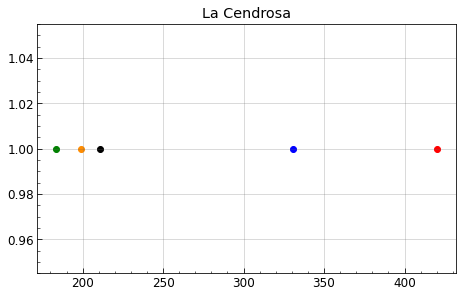

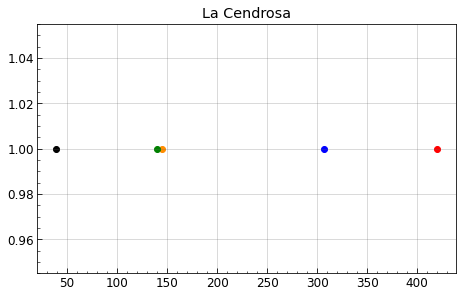

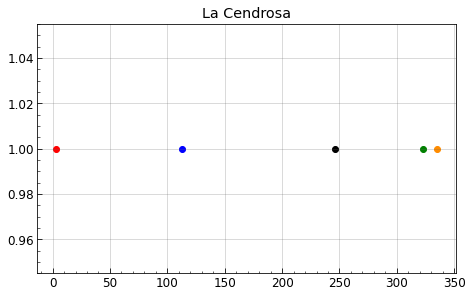

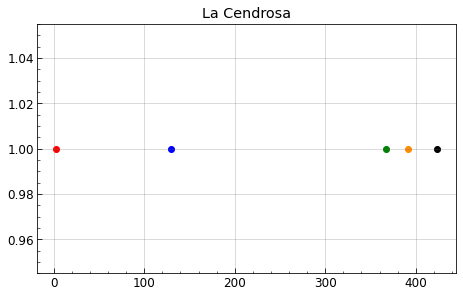

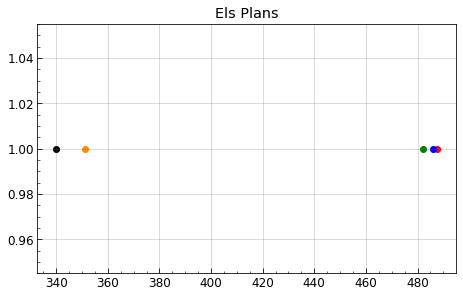

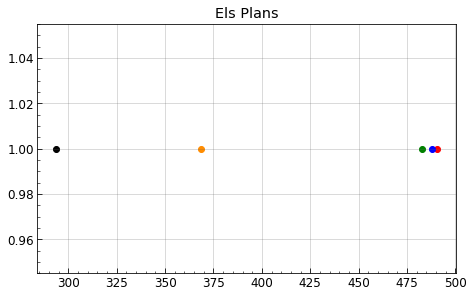

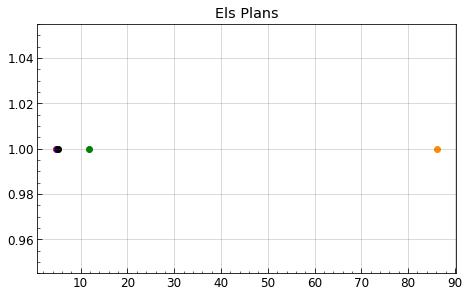

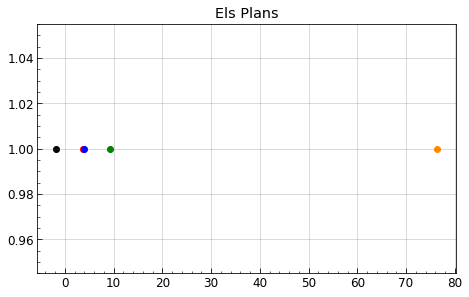

In [ ]:
savefig=True
timestamps=['2021-07-15T12:00:00', '2021-07-20T12:00:00']

title='off'
vars=['sens', 'flat']
labels=['Sensible heat flux (W m⁻²)', 'Latent heat flux (W m⁻²)']
xmins=[0, 0]
xmaxs=[550, 550]
nbins = 22
ylims=[(0,52), (0,52)]

# title=None
# vars=['s_pblh']#, 't2m', 'q2m','SWdnSFC','LWdnSFC','wind_speed_10m', 'wind_direction_10m']
# labels=['Diagnosed ABL height (m)','2-m temperature (K)', '2-m specific humidity (g kg⁻¹)', 'Downward shortwave radiation at surface (W m⁻²)', 'Downward longwave radiation at surface (W m⁻²)', '10-m wind speed (m s⁻¹)', '10-m wind direction (°)']
# xmins=[500,20, 7,     900,    320, 0, 0]
# xmaxs=[3500,35, 12,    1000,   410, 8, 360]
# nbins = 30
# ylims=[(0,50),None,None, None, None, None, None]
        
#cendrosa
for var, label, xmin, xmax, ylim in zip(vars, labels, xmins, xmaxs, ylims):
    for timestamp in timestamps:
        ds=mesoNH_cendrosa_cell
        ds_list=[cen_lmdz_noirr, cen_lmdz_irr100, cen_lmdz_routingfull_beta1, cen_mto]
        bins_timestamp(ds, var, timestamp, nbins=nbins, title=title, xlabel=label, 
                       xmin=xmin, xmax=xmax, ylim=ylim, 
                       ds_list=ds_list, site='- La Cendrosa')
        plt.title('La Cendrosa')
        if savefig:
            plt.savefig(f'figures/chap6/IOP_bins/bins_{var}_{timestamp}_cendrosa.png', dpi=300, bbox_inches='tight')

#elsplans
for var, label, xmin, xmax, ylim in zip(vars, labels, xmins, xmaxs, ylims):  
    for timestamp in timestamps:
        ds=mesoNH_elsplans_cell
        ds_list=[els_lmdz_noirr, els_lmdz_irr100, els_lmdz_routingfull_beta1, els_mto]
        bins_timestamp(ds, var, timestamp, nbins=nbins, title=title, xlabel=label, 
                       xmin=xmin, xmax=xmax, ylim=ylim, 
                       ds_list=ds_list, site='- Els Plans')
        plt.title('Els Plans')
        if savefig: 
            plt.savefig(f'figures/chap6/IOP_bins/bins_{var}_{timestamp}_elsplans.png', dpi=300, bbox_inches='tight')